# Data Analysis and Classification for Marketing Campaign Optimization
- By: Tien Nguyen
- [GitHub](https://github.com/tienngm2049)
- [LinkedIn](https://www.linkedin.com/in/tienngm2049/)
- Objective: Explore the dataset through EDA and predict term deposit subscriptions using classification models.
  
## Table of Contents

1. [**Part 1: Introduction**](#Part-1:-Introduction)
    - [1.1. Dataset Introduction](#1.1.-Dataset-Introduction)
    - [1.2. Dataset Description](#1.2.-Dataset-Description)
    - [1.3. Problem Definition](#1.3.-Problem-Definition)

2. [**Part 2: Exploratory Data Analysis**](#Part-2:-Exploratory-Data-Analysis)
    - [2.1. Import Libraries](#2.1.-Import-Libraries)
    - [2.2. Check Dtype and Missing Values](#2.2.-Check-Dtype-and-Missing-Values)
    - [2.3. Summary Statistics and Univariate Analysis](#2.3.-Summary-Statistics-and-Univariate-Analysis)
    - [2.4. Relationships Between Multiple Variables](#2.4.-Relationships-Between-Multiple-Variables)

3. [**Part 3: Classification Model**](#Part-3:-Classification-Model)
    - [3.1. Data Encoding](#3.1.-Data-Encoding)
    - [3.2. Split and Scale Data](#3.2.-Split-and-Scale-Data)
    - [3.3. Set Baseline](#3.3.-Set-Baseline)
    - [3.4. Build Models](#3.4.-Build-Models)
        - 3.4.1. [Decision Tree](#3.4.1.-Decision-Tree)
        - 3.4.2. [Random Forest](#3.4.2.-Random-Forest)
        - 3.4.3. [Extreme Gradient Boost (XGBoost)](#3.4.3.-XGBoost)
    - [3.5. Choose the Best Model](#3.5.-Choose-the-Best-Model)
    - [3.6. Final Model Deployment](#3.6.-Final-Model-Deployment)
    - [3.7. Final Conclusion](#3.7.-Final-Conclusion)

# Part 1: Introduction

## 1.1. Dataset Introduction

The "Bank Marketing" dataset, from the UCI Machine Learning Repository, focuses on phone-based marketing campaigns by a Portuguese bank.  It contains data about client demographics, communication, and past campaign outcomes. 

Further information of the dataset could be found at **[UCI Repo](https://archive.ics.uci.edu/dataset/222/bank+marketing)**.


## 1.2. Dataset Description
Dataset includes 17 variables:

#### Bank Client Data
| **Input Variable**   | **Description**                                     | **Possible Values**  |
|----------------------|-----------------------------------------------------|-----------------------|
| age                  | Age of the bank client.                             | Numeric               |
| job                  | Type of job of the bank client.                    | "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services" |
| marital              | Marital status of the bank client.                 | "married", "divorced", "single" (Note: "divorced" includes both divorced and widowed) |
| education            | Education level of the bank client.                | "unknown", "secondary", "primary", "tertiary" |
| default              | Has credit in default?                             | "yes", "no" |
| balance              | Average yearly balance in euros.                   | Numeric               |
| housing              | Has housing loan?                                  | "yes", "no" |
| loan                 | Has personal loan?                                 | "yes", "no" |

#### Related with the Last Contact of the Current Campaign
| **Input Variable**   | **Description**                                     | **Possible Values**  |
|----------------------|-----------------------------------------------------|-----------------------|
| contact              | Contact communication type.                        | "unknown", "telephone", "cellular" |
| day                  | Last contact day of the month.                    | Numeric               |
| month                | Last contact month of the year.                   | "jan", "feb", "mar", ..., "nov", "dec" |
| duration             | Last contact duration in seconds.                  | Numeric               |

#### Other Attributes
| **Input Variable**   | **Description**                                     | **Possible Values**  |
|----------------------|-----------------------------------------------------|-----------------------|
| campaign             | Number of contacts performed during this campaign for this client. | Numeric               |
| pdays                | Number of days that passed after the client was last contacted from a previous campaign. | Numeric (Note: -1 means the client was not previously contacted) |
| previous             | Number of contacts performed before this campaign for this client. | Numeric               |
| poutcome             | Outcome of the previous marketing campaign.        | "unknown", "other", "failure", "success" |

#### Desired Target
| **Output Variable** | **Description**                            | **Possible Values**  |
|---------------------|--------------------------------------------|----------------------|
| y                   | Client subscribed to a term deposit?       | "yes", "no"          |

## 1.3. Problem Definition

### 1.3.1. Term Deposit
   
A **Term Deposit**, also referred to as a **Time Deposit**, is a financial product provided by banks and financial institutions. It entails depositing a designated sum of money for a predefined period, often referred to as the "term" or "tenure." Throughout this tenure, the deposited funds accumulate interest t a fixed rate, typically higher than the interest offered by standard avings or deposit accounts.

### 1.3.2. Data Exploration
Before diving into the modeling phase, we need to understand the dataset thoroughly. Data exploration involves examining the dataset's structure, characteristics, and statistical properties. This step allows us to identify any trends, anomalies, or patterns in the data that might influence the outcome variable, i.e., the Term Deposit subscription. Key aspects to explore include client demographics, communication details, and the outcomes of previous marketing campaigns.

### 1.3.3. Classification Modeling
Once we have a firm grasp of the dataset, we will proceed with classification modeling. Classification is a supervised learning technique that aims to predict the categorical outcome, in our case, whether a client will subscribe to a Term Deposit. We will employ various machine learning algorithms to build predictive models and assess their performance. The goal is to select the most accurate and reliable model that can assist in making informed decisions for future marketing campaigns.

# Part 2: Exploratory Data Analysis 

## 2.1. Import Libraries

**Note:** You can either import the necessary packages separately or use an Anaconda environment to run this code.

To import the required packages,first you need to install Python environment and then using using `pip` to install required packages:

```python
pip install pandas numpy matplotlib seaborn scikit-learn xgboost
```


In [1]:
import pandas as pd
import numpy as np

# Set display options for Pandas
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme and figure format
sns.set_theme(style='ticks')
%config InlineBackend.figure_format = 'retina'

# Customize plot settings
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# Packages for machine learning
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
original_df = pd.read_csv('bank+marketing/bank/bank-full.csv', delimiter=';')
print(original_df.shape)
original_df.head()

(45211, 17)


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [3]:
df = original_df.copy()

## 2.2. Check Dtype and Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum().to_frame(name='missing').T

age  job  marital  education  default  balance  housing  loan  \
missing    0    0        0          0        0        0        0     0   

         contact  day  month  duration  campaign  pdays  previous  poutcome  y  
missing        0    0      0         0         0      0         0         0  0

**Dataset Overview:**
- Dataset Name: Bank Marketing
- Entries: 45,211
- Variables: 17

**Data Composition:**
- Numerical features (integer): age, balance, day, duration, campaign, pdays, previous
- Categorical features (object): job, marital, education, default, housing, loan, contact, month, poutcome, y

**Data Quality:**
- No missing values detected.
- Appropriate data types: Integers for numerical, Objects (strings) for categorical.
- Some necessary changes: month should be changed into numerical data.

This dataset appears well-prepared for analysis and predictive modeling tasks.

## 2.3. Summary Statistics and Univariate Analysis

Transform `month` into numerical data:

In [6]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [7]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr':4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep':9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month'] = df['month'].map(month_mapping)

In [8]:
numeric_cols = [col for col in df.columns if df[col].dtype != object]
object_cols = [col for col in df.columns if df[col].dtype == object]
print(f"{len(numeric_cols)} numerical features: \n {numeric_cols}")
print()
print(f"{len(object_cols)} categorical features: \n {object_cols}")

8 numerical features: 
 ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

9 categorical features: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']


### 2.3.1. Numerical Features

First we will have a look at descriptive statistics table and then use visualization to explore more:

In [9]:
df.describe()

age   balance      day    month  duration  campaign    pdays  \
count 45211.00  45211.00 45211.00 45211.00  45211.00  45211.00 45211.00   
mean     40.94   1362.27    15.81     6.14    258.16      2.76    40.20   
std      10.62   3044.77     8.32     2.41    257.53      3.10   100.13   
min      18.00  -8019.00     1.00     1.00      0.00      1.00    -1.00   
25%      33.00     72.00     8.00     5.00    103.00      1.00    -1.00   
50%      39.00    448.00    16.00     6.00    180.00      2.00    -1.00   
75%      48.00   1428.00    21.00     8.00    319.00      3.00    -1.00   
max      95.00 102127.00    31.00    12.00   4918.00     63.00   871.00   

       previous  
count  45211.00  
mean       0.58  
std        2.30  
min        0.00  
25%        0.00  
50%        0.00  
75%        0.00  
max      275.00

**Some outstanding notes from table:**

From the descriptive statistics, we can draw the following insights about the numeric variables in the dataset:

- `age`: The age of clients ranges from 18 to 95 years, with the majority falling within the 33 to 48 age range. The average age of clients who participated in the campaign is approximately 41 years.

- `balance`: The balance in clients' accounts exhibits significant variation, ranging from a minimum of -8019 euros to a maximum of 102127 euros. While there are clients with substantial balances, the majority have account balances under 1400 euros. Notably, this variable includes negative balances, indicating financial liabilities.

- `day`: The last contact day of the month during the campaign has an average value of approximately 16. The day varies between 1 and 31, indicating a fairly uniform distribution across the month.

- `duration`: The average duration of the last contact with clients during the campaign is about 258.16 seconds. The duration varies widely, ranging from short interactions of 0 seconds to lengthy conversations of up to 4918 seconds. Longer contact durations suggest more involved conversations or interactions.

- `campaign`: On average, clients were contacted approximately 2.76 times during this campaign. The number of contacts per client ranges from 1 to 63, with the majority of clients receiving 1 to 3 contacts. There are some cases with higher contact frequencies.

- `pdays`: The average number of days since the client was last contacted from a previous campaign is approximately 40.20 days. A value of -1 indicates that the client was not contacted previously. Interestingly, some clients have been contacted as long as 871 days after a previous campaign, suggesting varying time intervals between campaigns.

- `previous`: The average number of contacts performed before this campaign and for this client is around 0.58. Most clients had no previous contacts, but there are instances where clients were contacted up to 275 times before this campaign, indicating higher engagement levels.

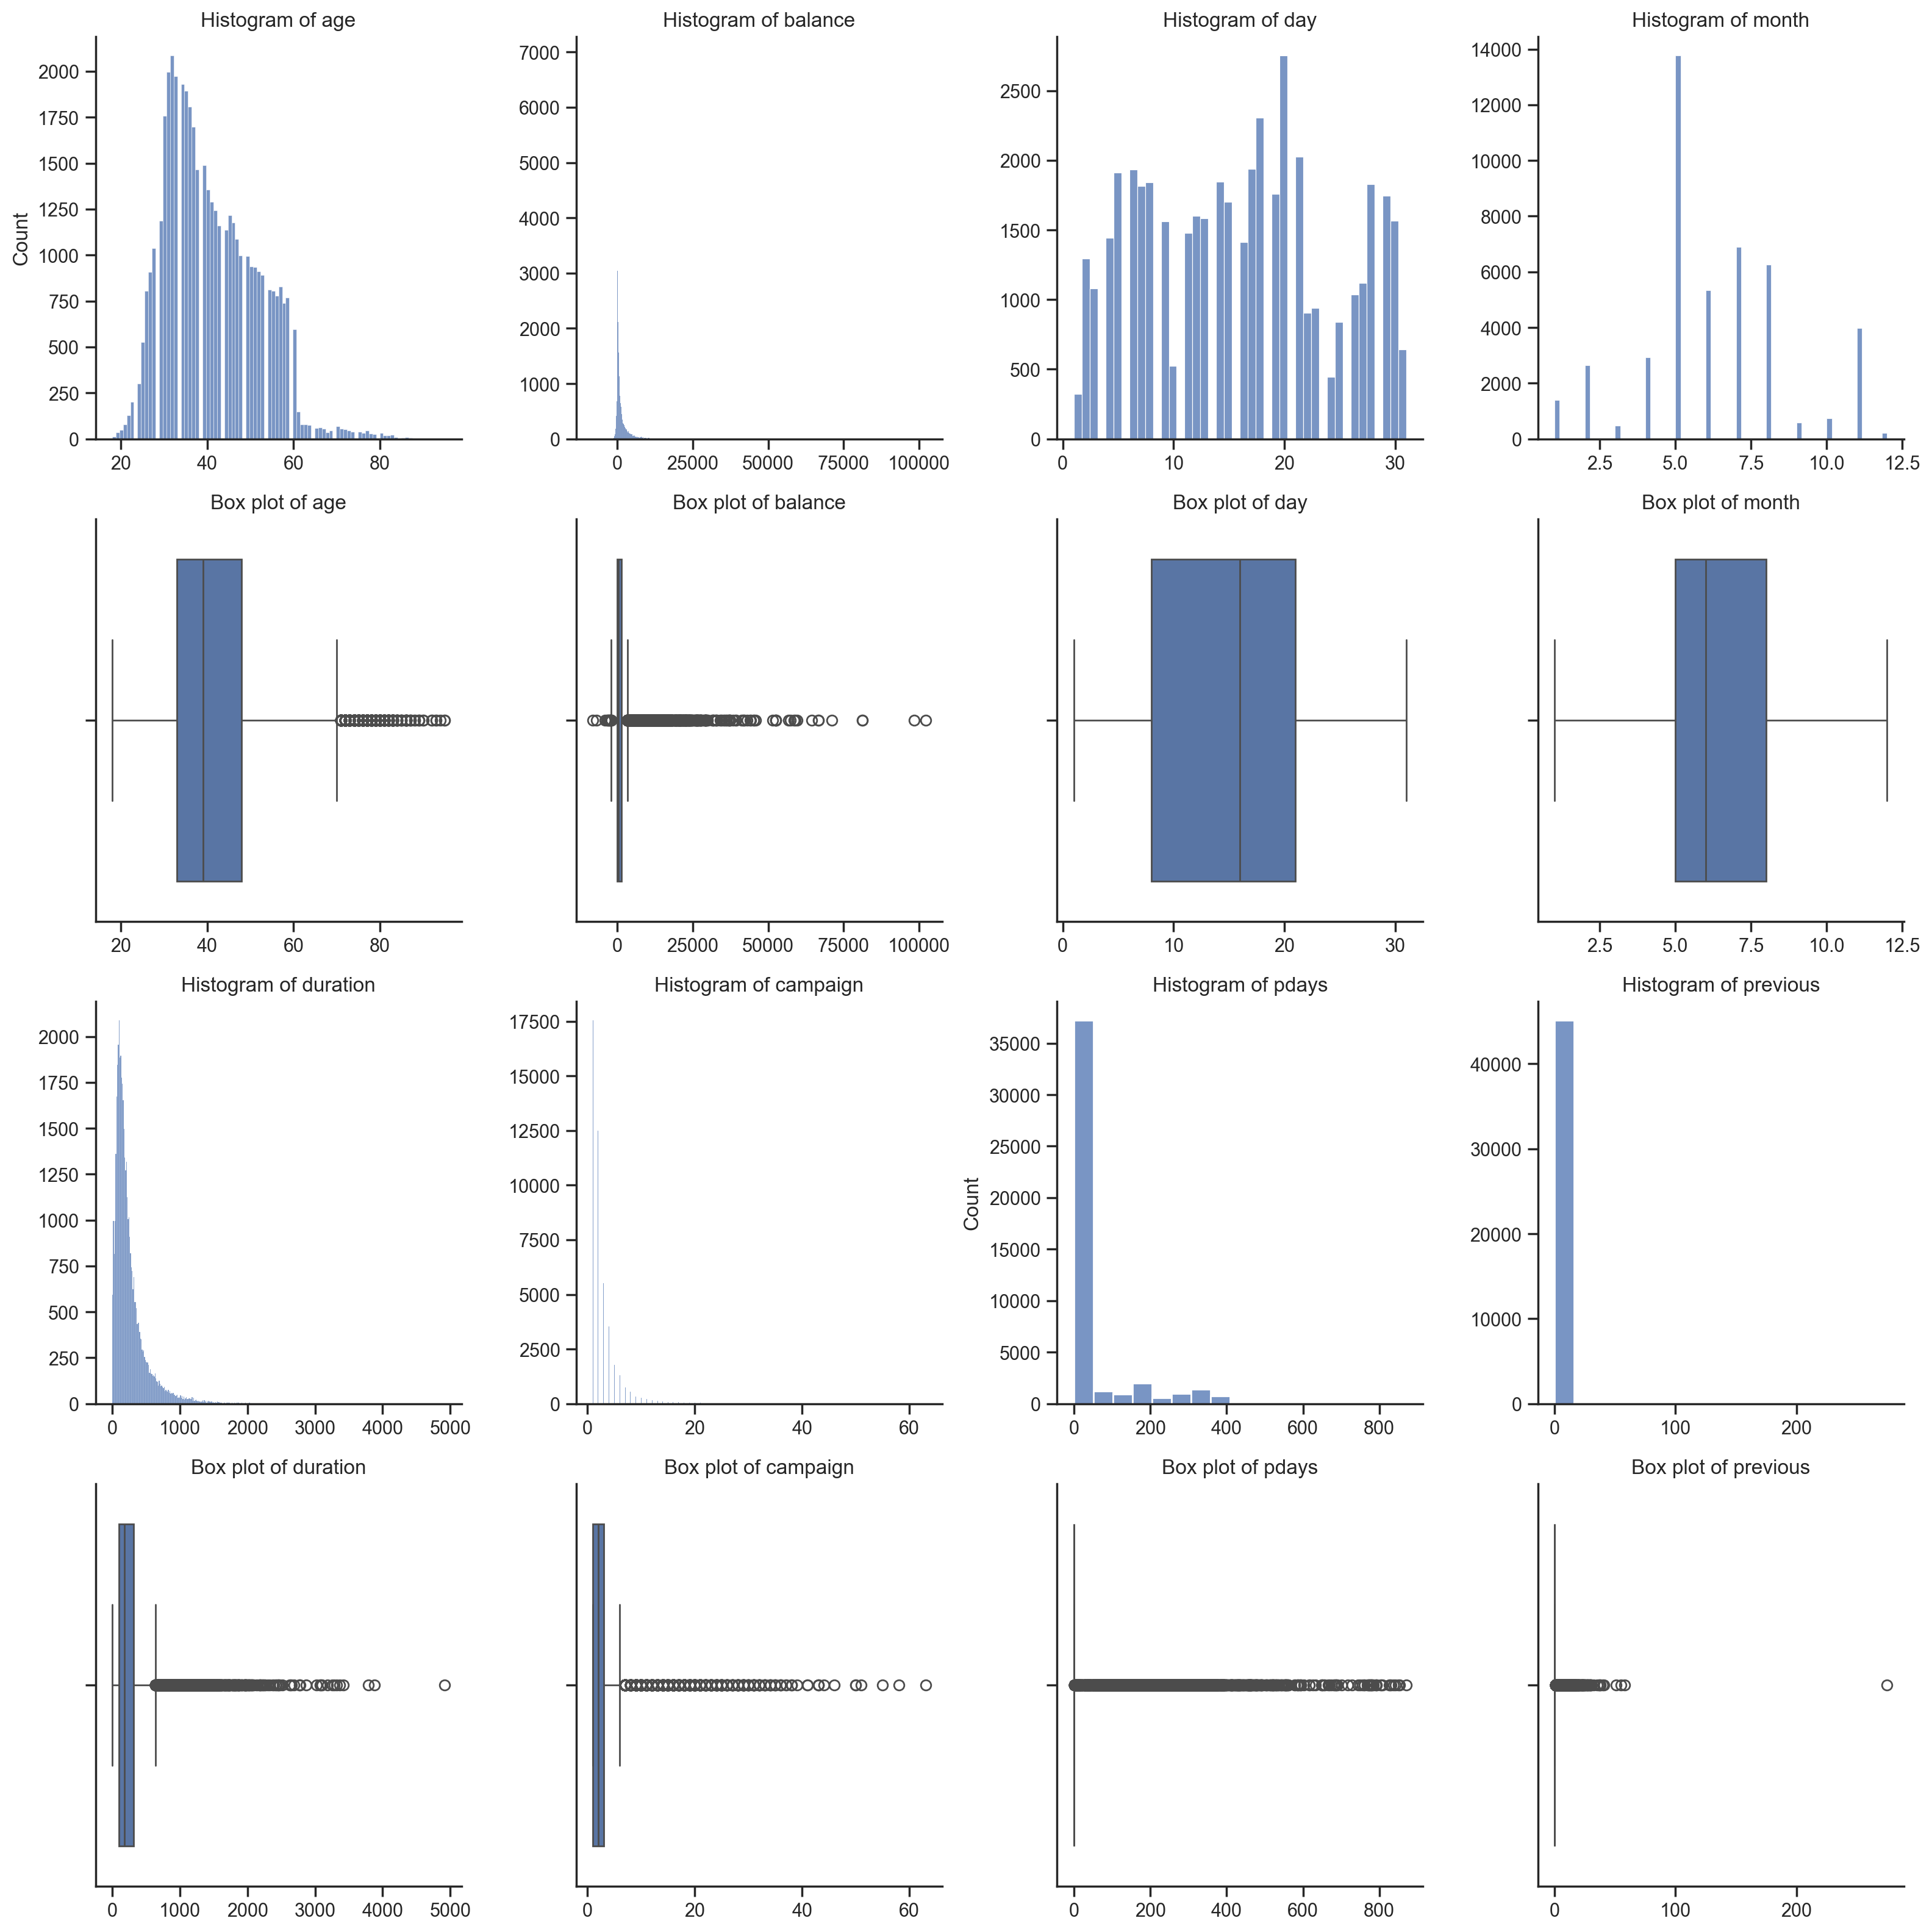

In [10]:
_, axes = plt.subplots(4, 4, figsize=(16, 16))

for i, col in enumerate(numeric_cols[:4]):
    sns.histplot(data=df, x=col, ax=axes[0, i])
    axes[0, i].set_xlabel('')
    axes[0, i].set_title(f'Histogram of {col}')
    if i != 0:
        axes[0, i].set_ylabel('')
    sns.boxplot(data=df, x=col, ax=axes[1, i])
    axes[1, i].set_xlabel('')
    axes[1, i].set_title(f'Box plot of {col}')

for i, col in enumerate(numeric_cols[4:]):
    sns.histplot(data=df, x=col, ax=axes[2, i])
    axes[2, i].set_xlabel('')
    axes[2, i].set_title(f'Histogram of {col}')
    if i != 2:
        axes[2, i].set_ylabel('')
    sns.boxplot(data=df, x=col, ax=axes[3, i])
    axes[3, i].set_xlabel('')
    axes[3, i].set_title(f'Box plot of {col}')
plt.tight_layout()

**Comment on the histograms and box plots of numerical features:**

- The distributions of `age`, `duration`, `balance`, `campaign`, `pdays`, and `previous` are significantly right-skewed, with a substantial number of outliers toward the higher values.
- The distribution of `day` and `month` appear to be relatively normal, with a higher frequency of last contacts occurring around the middle of the month and year respectively.
- The boxplots of `balance`, `duration`, `campaign`, `pdays`, and `previous` exhibit small interquartile ranges (IQRs), suggesting that most customers have values for these variables concentrated around the median. However, the presence of numerous outliers contributes to the wide range observed in these variables.

These observations provide insights into the characteristics of the dataset's numeric variables, highlighting the presence of outliers and the distributions' skewness. These insights will be important to consider when performing further analysis and modeling.

### 2.3.2. Categorical Varibles

In [11]:
df.describe(include='object')

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

       poutcome      y  
count     45211  45211  
unique        4      2  
top     unknown     no  
freq      36959  39922

In [12]:
for col in object_cols:
    unique_values = df[col].unique()
    if len(unique_values) > 5:
        print(f"Total of {len(unique_values)} unique values in '{col}'.")
    else:
        print(f"Total of {len(unique_values)} unique values in '{col}': {unique_values}")

Total of 12 unique values in 'job'.
Total of 3 unique values in 'marital': ['married' 'single' 'divorced']
Total of 4 unique values in 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Total of 2 unique values in 'default': ['no' 'yes']
Total of 2 unique values in 'housing': ['yes' 'no']
Total of 2 unique values in 'loan': ['no' 'yes']
Total of 3 unique values in 'contact': ['unknown' 'cellular' 'telephone']
Total of 4 unique values in 'poutcome': ['unknown' 'failure' 'other' 'success']
Total of 2 unique values in 'y': ['no' 'yes']


We will leave out `job` (12 unique values) and plot only the other features:

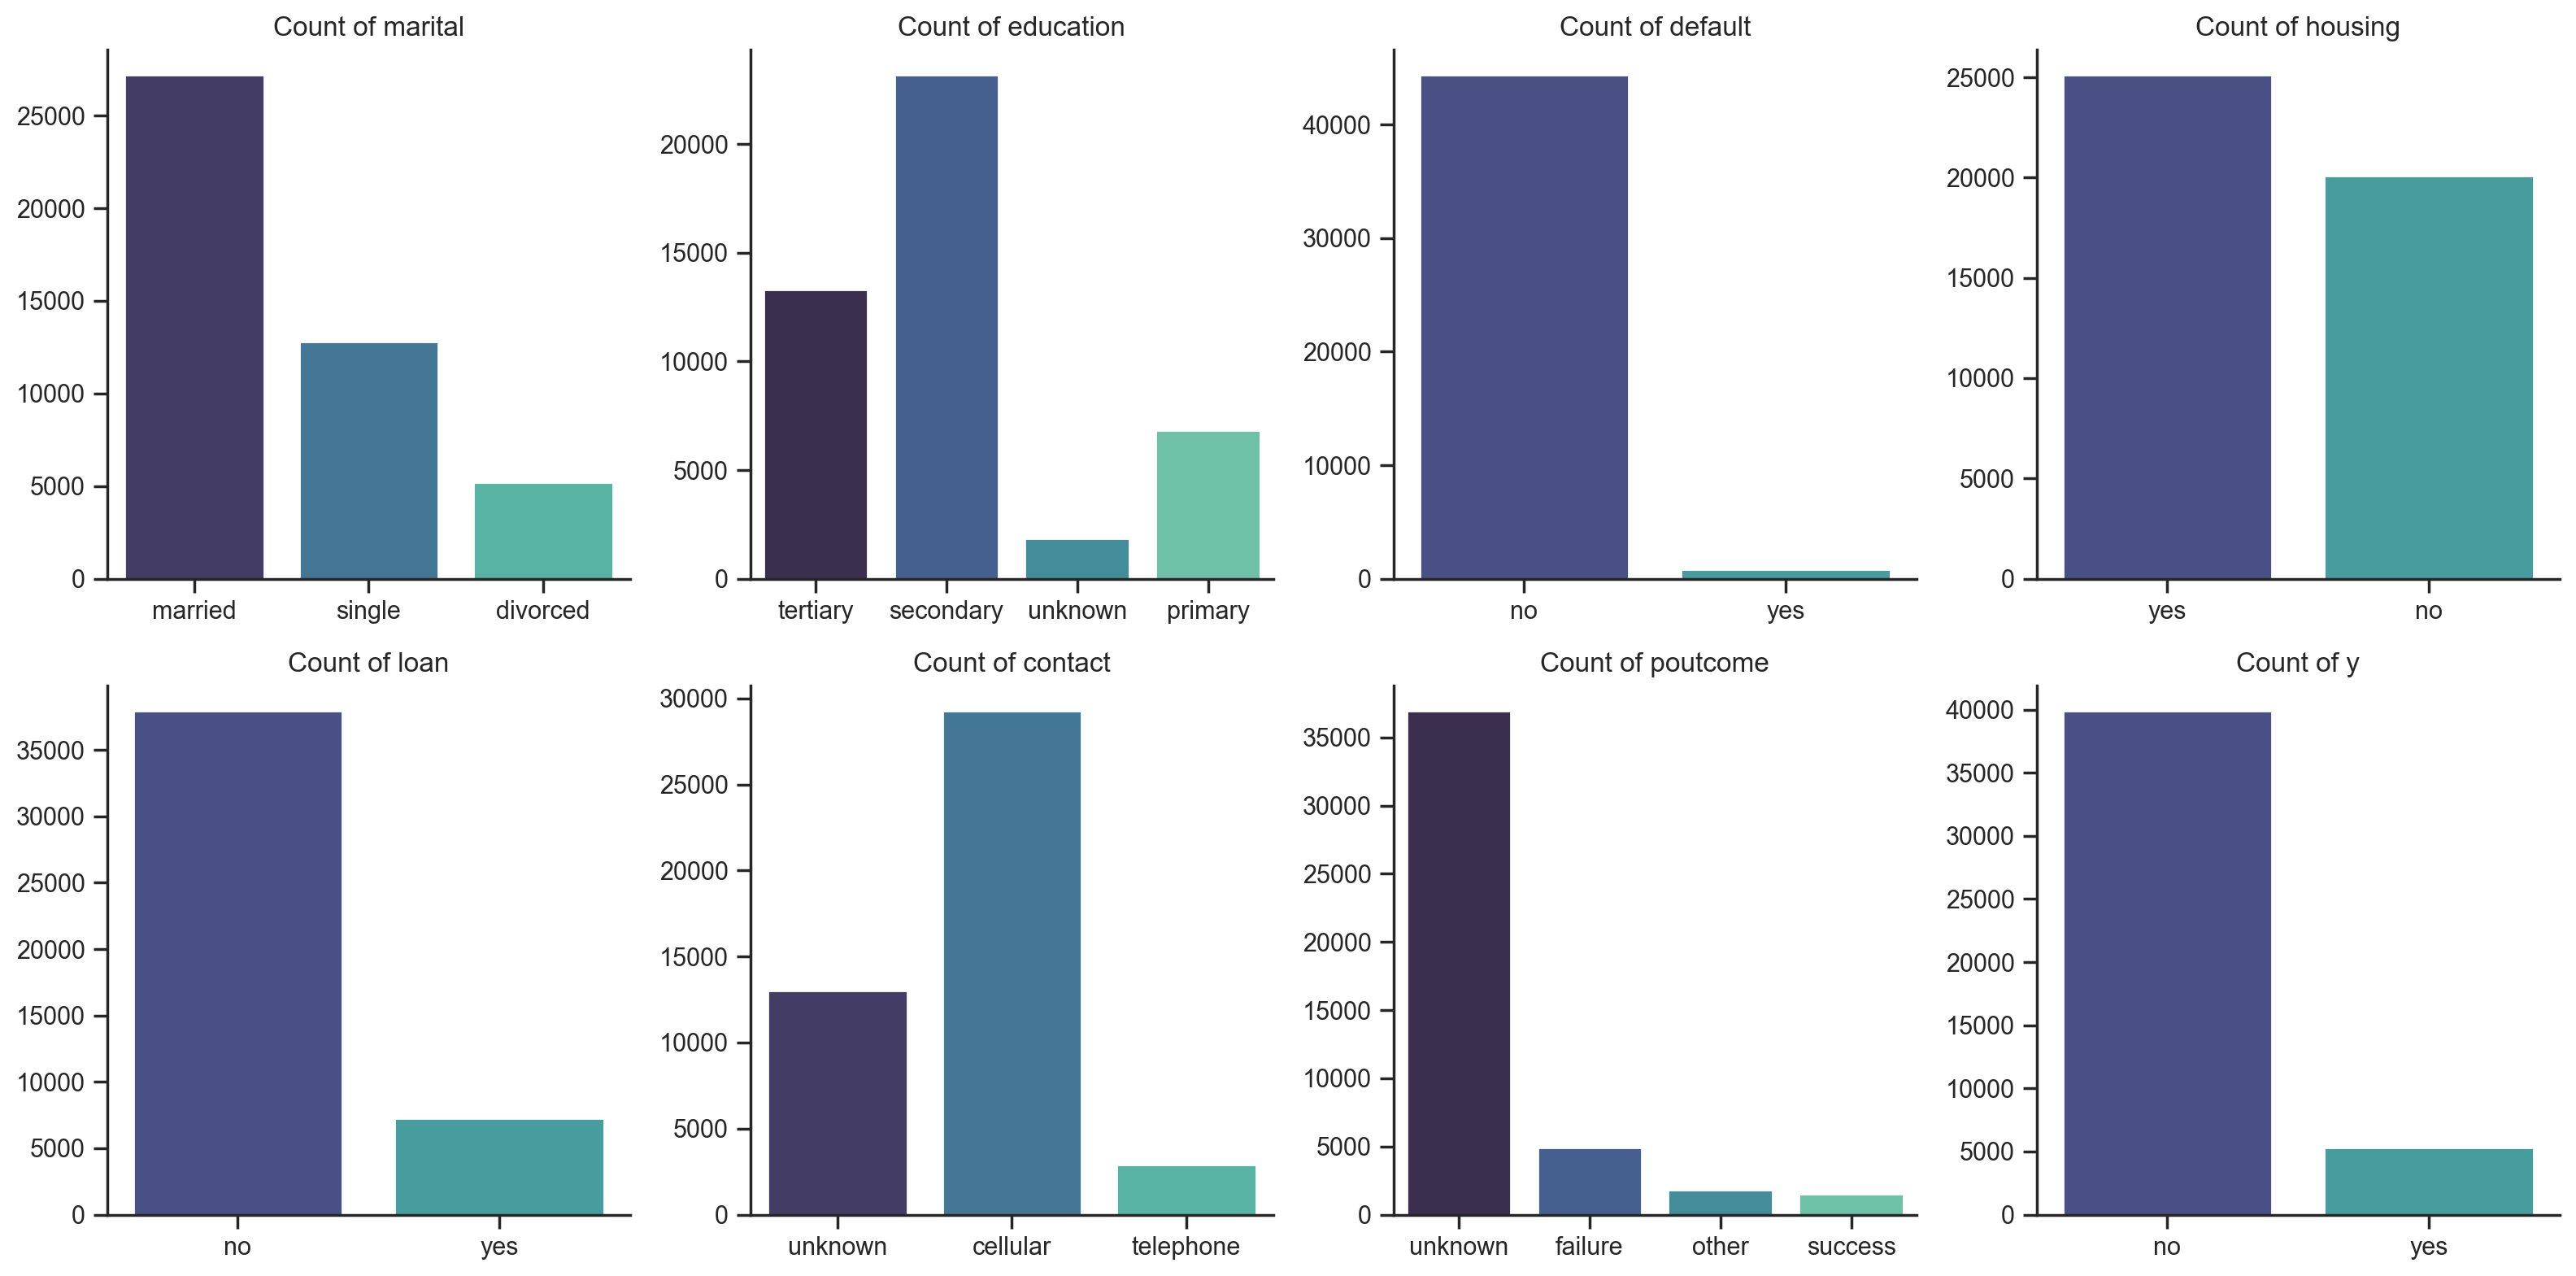

In [13]:
categorical_cols = [
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'poutcome',
    'y'
]

_, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, palette='mako', ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f"Count of {col}")
    axes[i // 4, i % 4].set_xlabel('')
    axes[i // 4, i % 4].set_ylabel('')
    
plt.tight_layout();

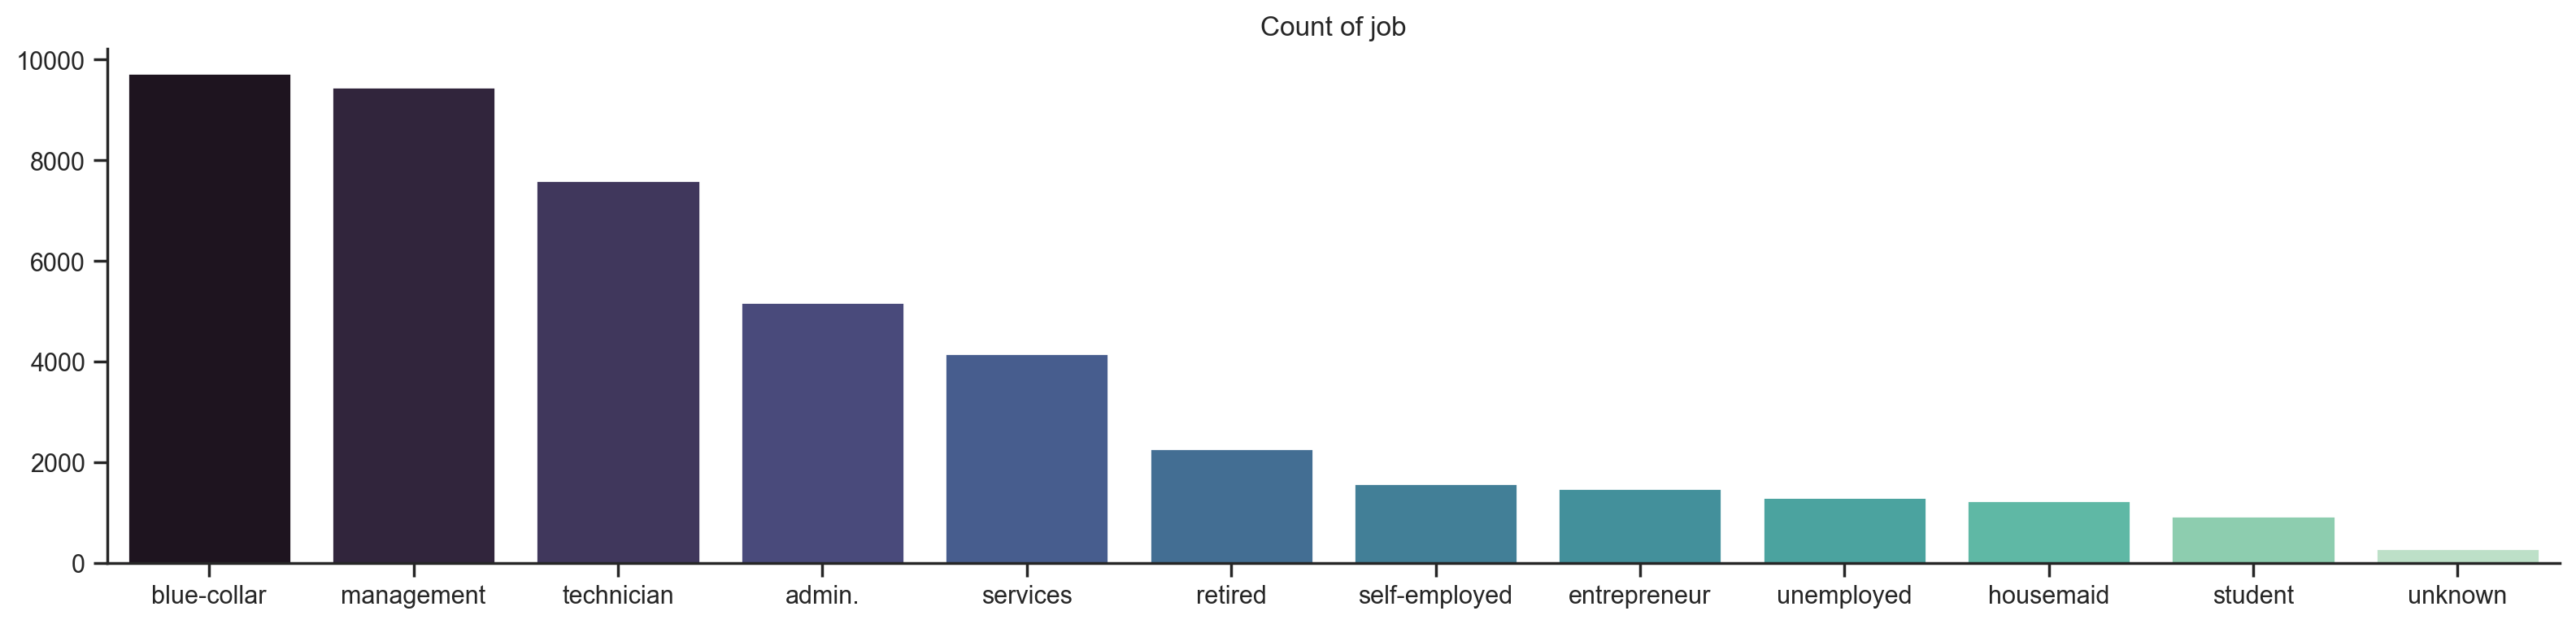

In [14]:
plt.figure(figsize=(16, 4))

order = df['job'].value_counts().index
sns.countplot(data=df, x='job', palette='mako', order=order)
plt.title(f"Count of job")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

**Note:**
In the dataset, it appears that categorical variables may exert a more significant influence on our final target variable compared to numerical data. To gain a deeper understanding of the impact of these variables, I will conduct further analysis in conjunction with the variable `y` at a later stage.

## 2.4. Relationships Between Multiple Variables
### 2.4.1. Time Series and Trend Analysis

In [15]:
time_series = df.groupby(['month', 'day', 'y']).size().reset_index(name='count')
time_series_pivot = time_series.pivot_table(index=['month', 'day'], columns='y', values='count', fill_value=0).reset_index()
time_series_pivot

y    month  day   no   yes
0        1    6 2.00  0.00
1        1    7 3.00  1.00
2        1    8 3.00  2.00
3        1   11 5.00  7.00
4        1   12 9.00 13.00
..     ...  ...  ...   ...
313     12   27 1.00  0.00
314     12   28 7.00  9.00
315     12   29 6.00  7.00
316     12   30 3.00  1.00
317     12   31 1.00  0.00

[318 rows x 4 columns]

There are only **318 out of 365** days recorded. 

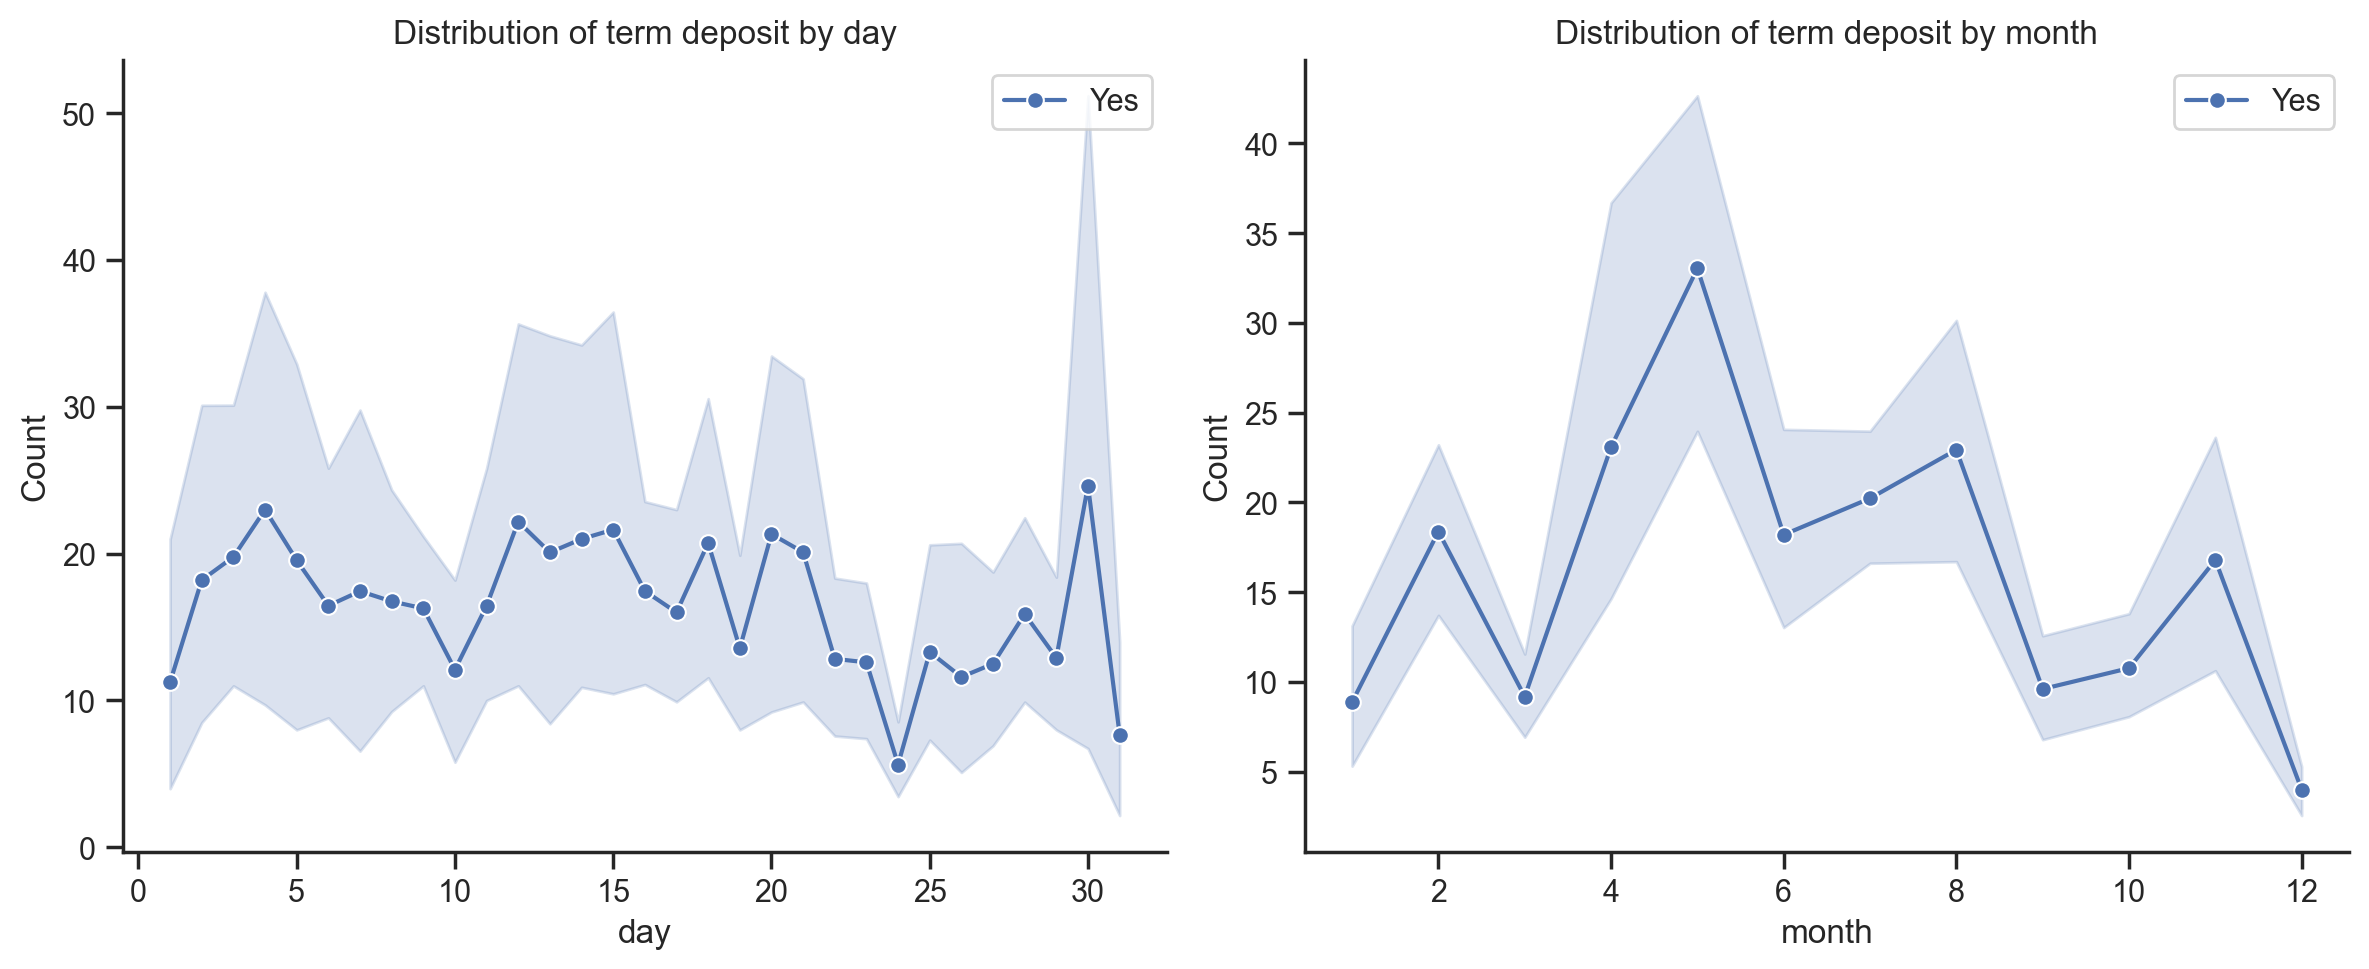

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=time_series_pivot, x='day', y='yes', marker='o', label='Yes')
#sns.lineplot(data=time_series_pivot, x='day', y='no', marker='o', label='No')
plt.ylabel('Count')
plt.title('Distribution of term deposit by day')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(data=time_series_pivot, x='month', y='yes', marker='o', label='Yes')
#sns.lineplot(data=time_series_pivot, x='month', y='no', marker='o', label='No')
plt.ylabel('Count')
plt.title('Distribution of term deposit by month')
plt.legend()

plt.tight_layout()

**Note:**

The time series analysis reveals intriguing patterns regarding the relationship between subscription to term deposits and specific time intervals.

- **Middle of the Month and Year:** Subscriptions to the term deposit exhibit a distinctive trend during certain time frames. Specifically, a higher proportion of clients tend to subscribe to the term deposit during the middle of the month (from the 10th to the 20th) and the middle of the year (spanning from April to August). This suggests the presence of seasonal or cyclical factors that influence clients' decisions to subscribe during these particular periods.

- **End and Start of the Month:** Additionally, the 'day' chart highlights a sudden surge in subscriptions at the end and beginning of the month. This could indicate an interesting pattern related to financial or budgetary cycles for clients.

- **Variability in Other Time Periods:** On the other hand, subscription rates are comparatively lower during other time intervals, indicating potential variations in client behavior and preferences.

### 2.4.2. Correlation Analysis

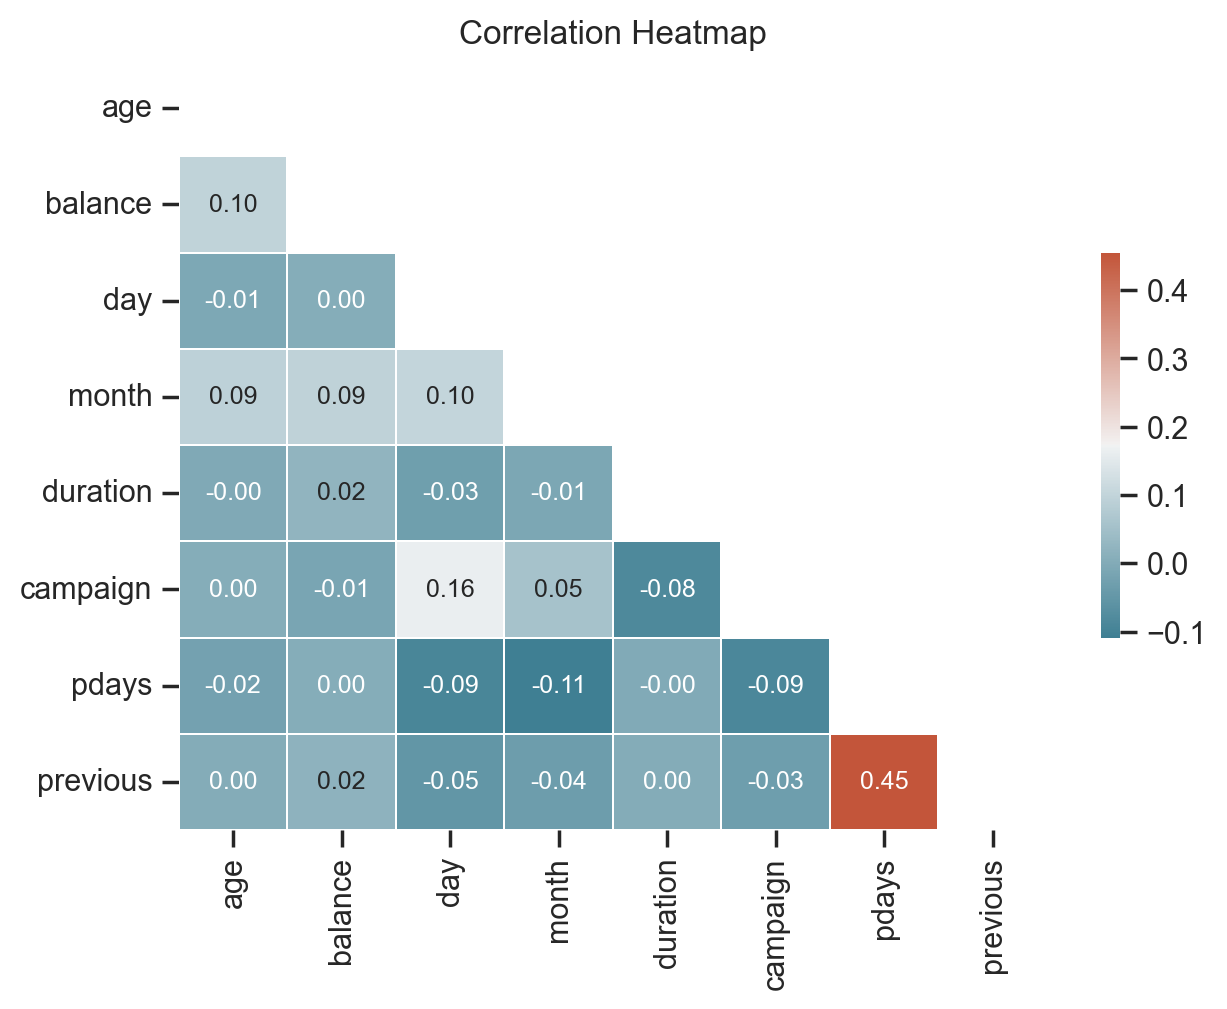

In [17]:
plt.figure(figsize=(7,5))
corr = df.corr(numeric_only=True)
sns.heatmap(
    corr, 
    mask=np.triu(corr), 
    annot=True, fmt='.2f', 
    cbar_kws={'shrink':0.5}, 
    # vmin=-1, vmax=1, center=0,
    linewidth=0.1,
    linecolor='w', 
    annot_kws={'size': 9}, 
    cmap=sns.diverging_palette(220, 20, as_cmap=True)
)
plt.title('Correlation Heatmap');

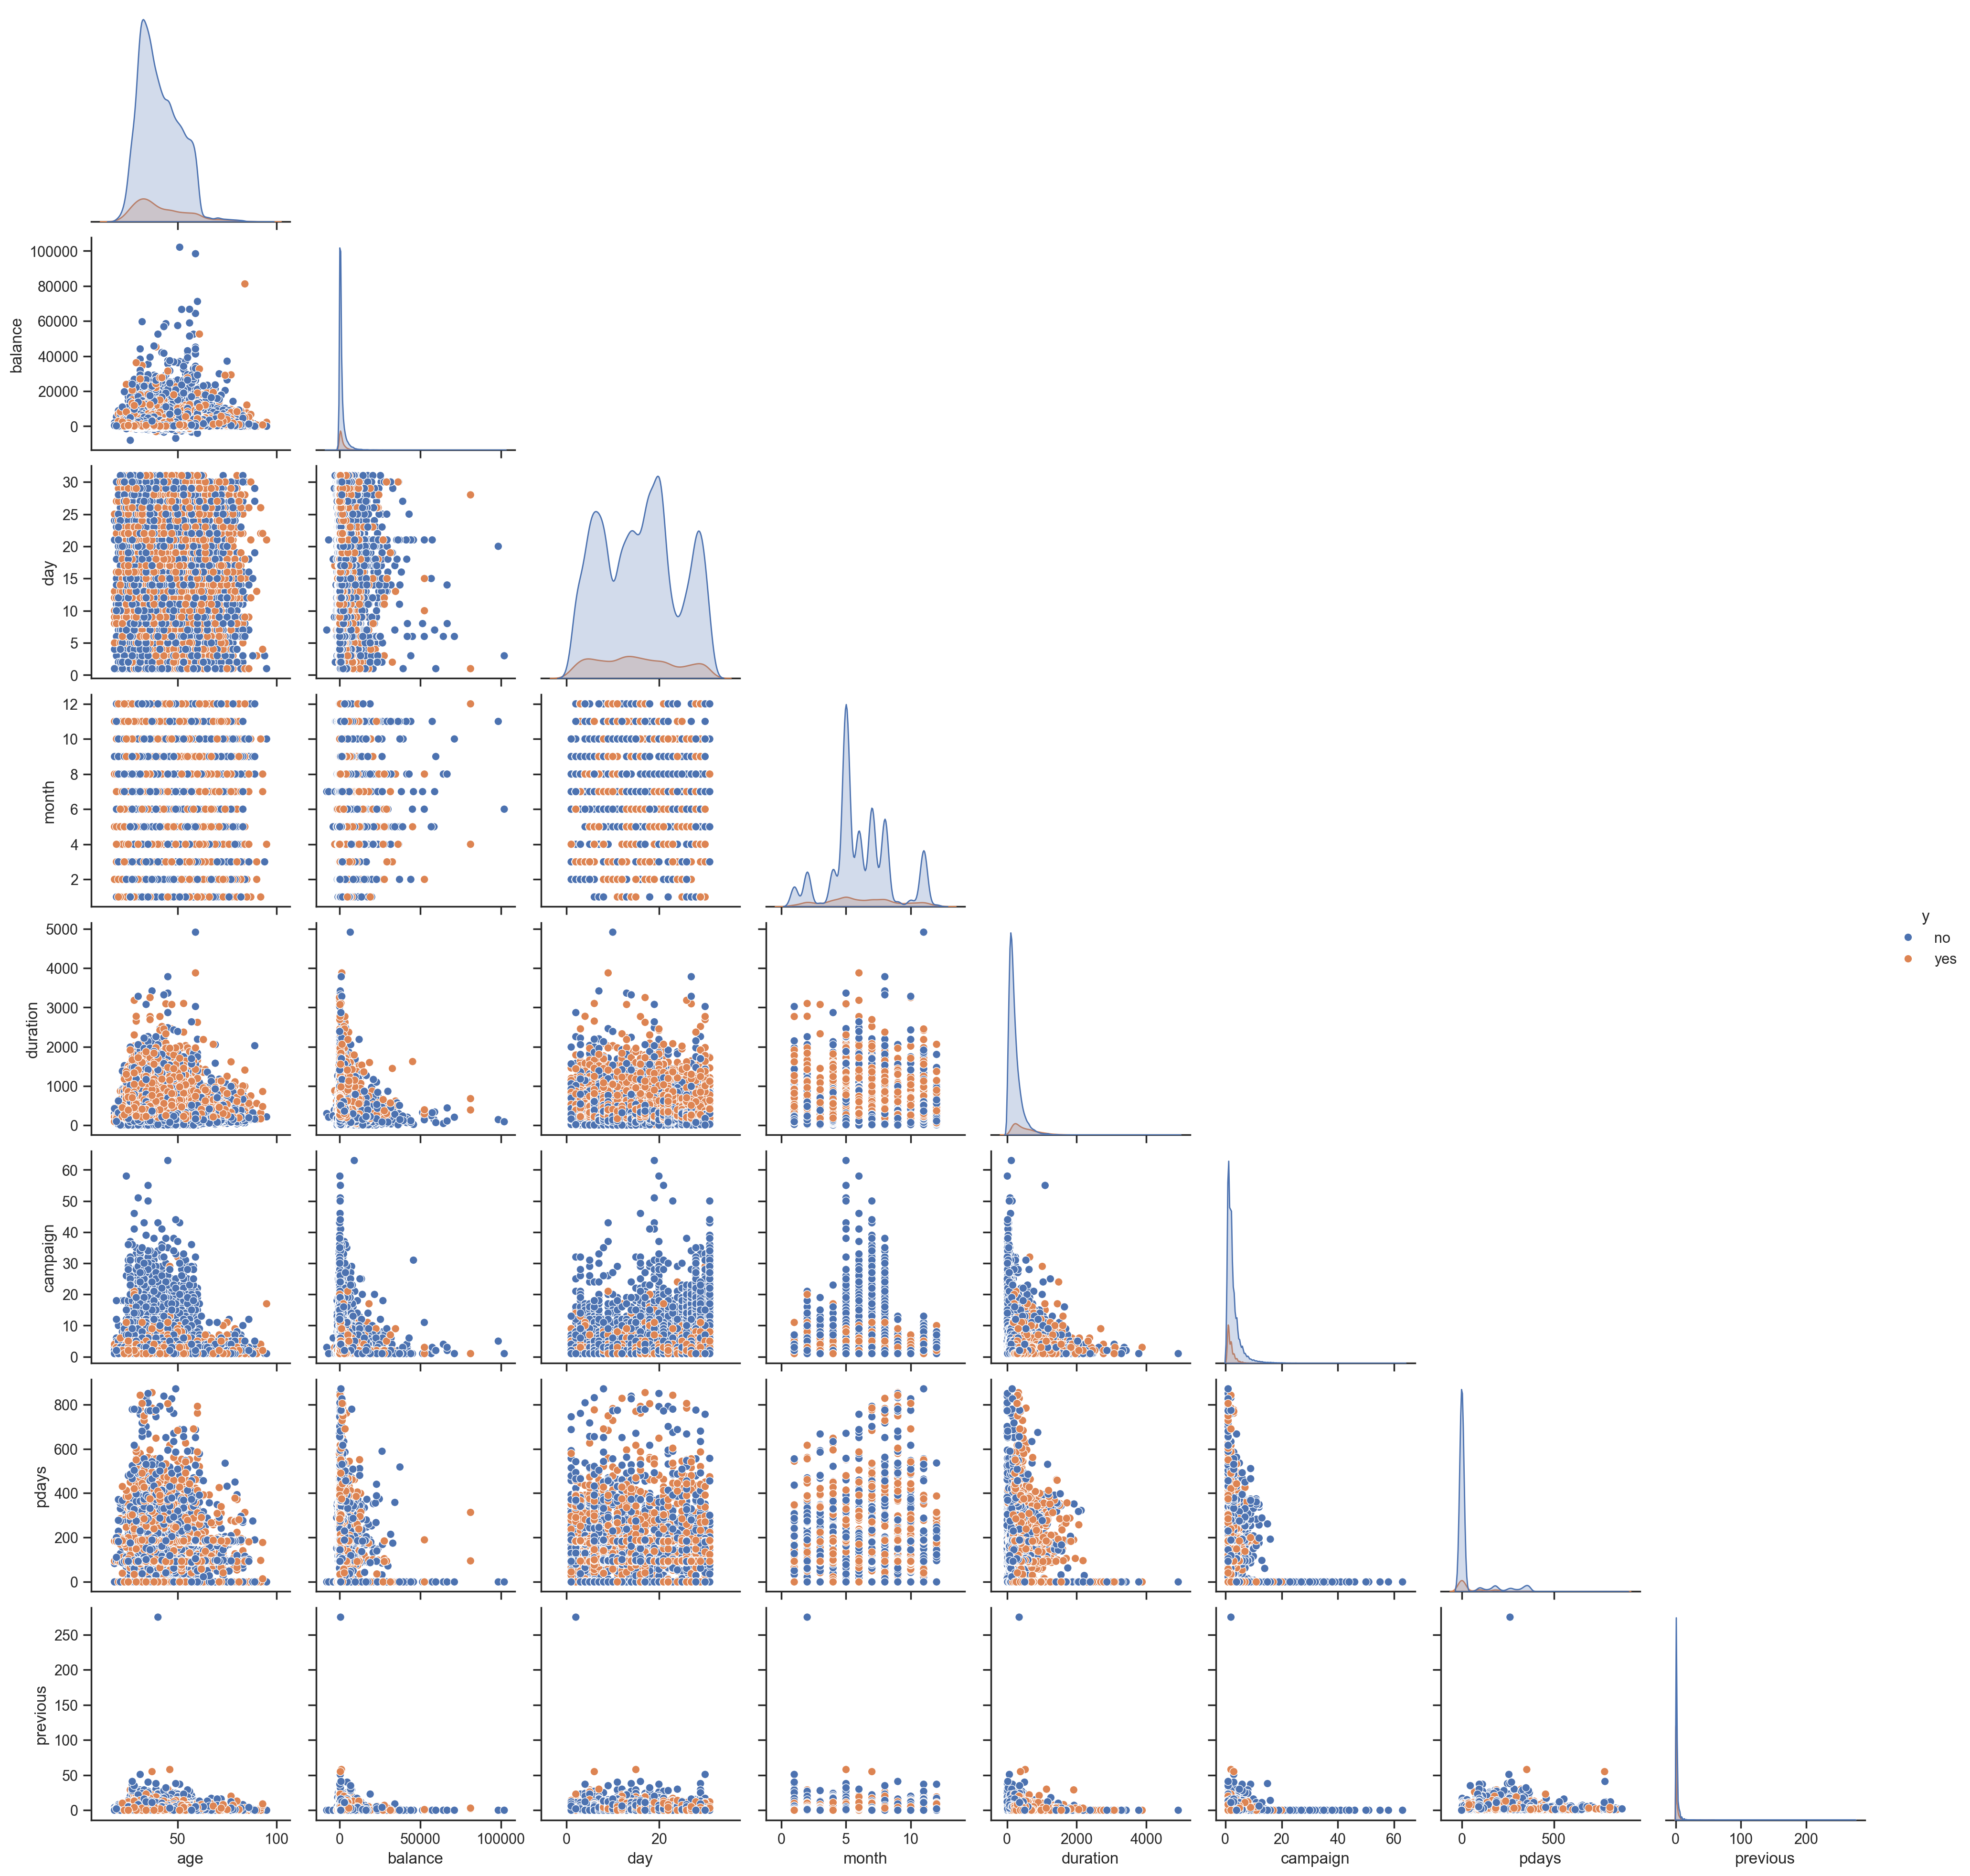

In [18]:
sns.pairplot(df, corner=True, hue='y');

**Note:**
The heatmap revealing modest correlations among variables around 0, which suggests that there are no strong linear relationships between the variables

### 2.4.3. Check Relationship between Predictive Variables and Target variable (y)

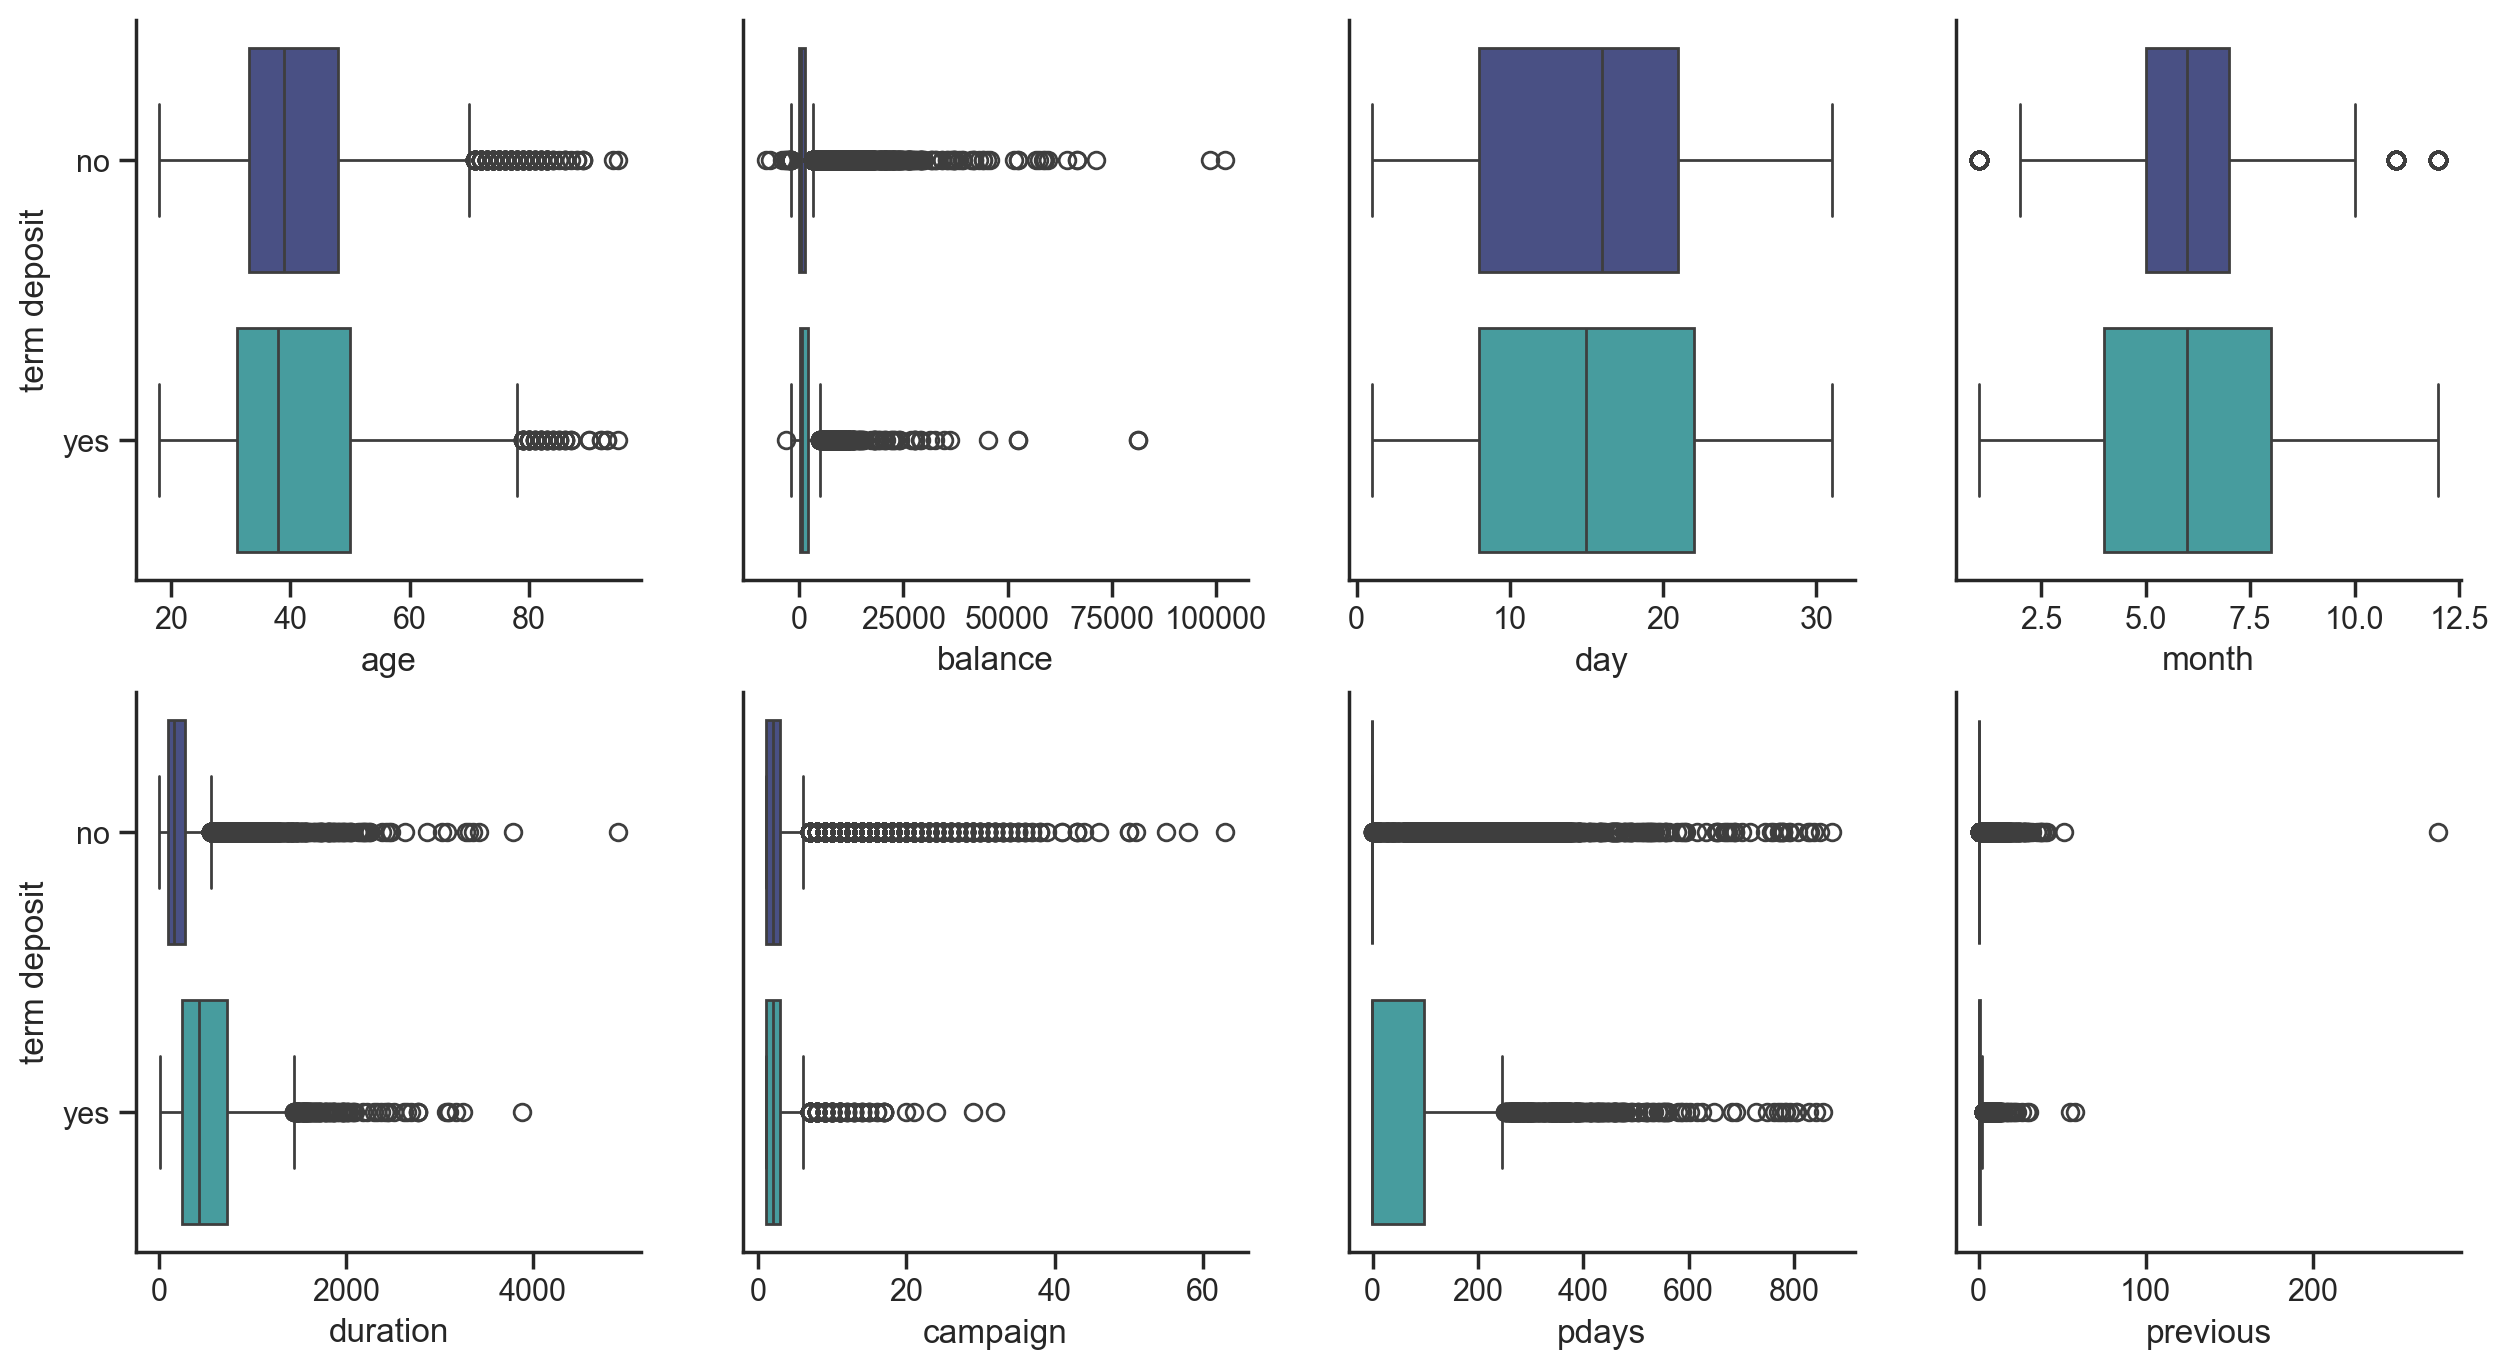

In [19]:
_, axes = plt.subplots(2, 4, figsize=(15, 8))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y='y', x=col, ax=axes[i//4, i%4], palette='mako')
    if i == 0 or i == 4:
        axes[i // 4, i % 4].set_ylabel("term deposit")
    else:
        axes[i // 4, i % 4].set_ylabel("")
        axes[i // 4, i % 4].set_yticks([])

**Note:**

Upon initial examination, the box plots depicting categorical features segregated by term deposit status appear relatively similar. However, there are distinct variations observed in the distributions of `duration`, `month`, and `pdays`. These variables appear to have a substantial influence on the likelihood of successful subscriptions. Further investigation and analysis of these variables are warranted to understand their significance in more detail.

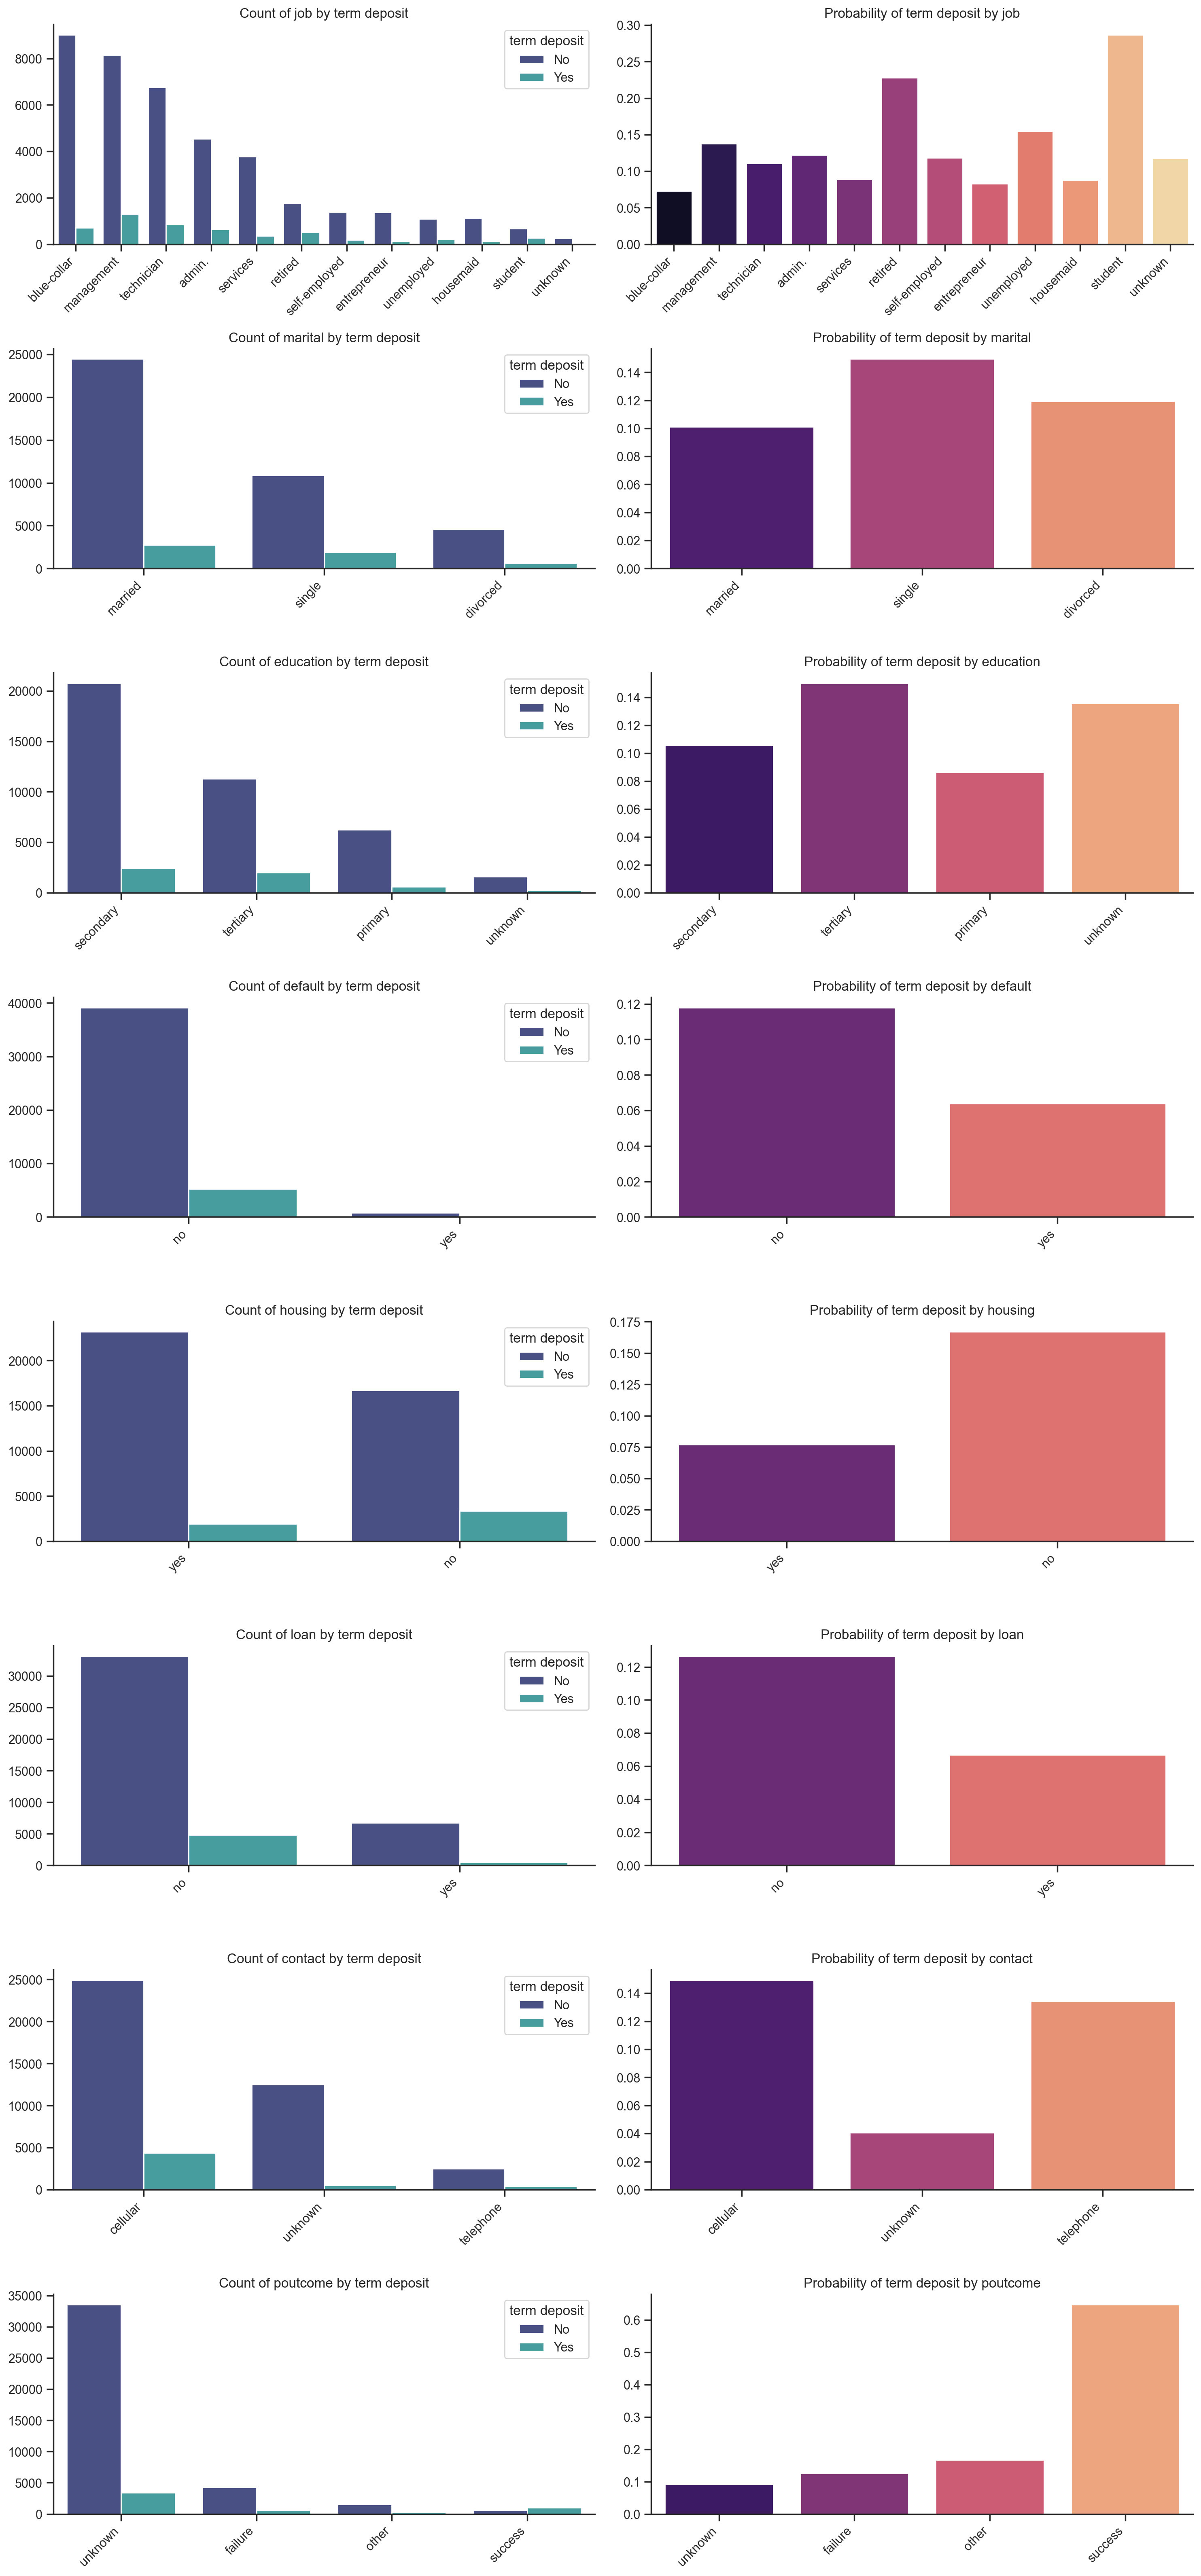

In [20]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

num_features = len(categorical_features)

fig, axes = plt.subplots(num_features, 2, figsize=(15, 32))

for i, col in enumerate(categorical_features):
    order = df[col].value_counts().index
    
    sns.countplot(data=df, x=col, hue='y', ax=axes[i, 0], palette='mako', order=order)
    axes[i, 0].set_title(f"Count of {col} by term deposit")
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')
    axes[i, 0].legend(title='term deposit', labels=['No', 'Yes'])
    axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=45, horizontalalignment='right')

    df['y_numeric'] = df['y'].map({'no': 0, 'yes': 1})
    probability = df.groupby(col)['y_numeric'].mean().sort_values(ascending=False)
    sns.barplot(x=probability.index, y=probability.values, ax=axes[i, 1], palette='magma', order=order)
    axes[i, 1].set_title(f'Probability of term deposit by {col}')
    axes[i, 1].set_ylabel('')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_xticklabels(axes[i, 1].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
df=df.drop(['y_numeric'],axis=1);

**Note:** 

Upon examining the right-hand side of the visualization, it becomes evident that the probabilities for clients subscribing to a term deposit based on different features are relatively low, ranging from around 0.1 to 0.2 overall.

Comparing the charts reveals several intriguing insights:

- **Job**: While 'students' and 'retired' are among the least common job categories, they exhibit the highest probabilities of subscribing to a term deposit, approximately 0.3 and 0.25, respectively. On the other hand, despite 'blue-collar', 'management', and 'technician' representing the highest job counts, their probabilities are relatively similar to other professions.

- **Marital Status**: Although individuals classified as 'married' exhibit the lowest subscription probability, they constitute the largest count in both subscribing and not subscribing groups. 'Single' individuals seem more promising both in terms of rate and count. However, 'divorced' individuals, while having a low count, show a higher subscription rate than 'married', suggesting that the bank should carefully consider targeting strategies for the next campaigns.

- **Education**: 'Tertiary' education levels have the highest subscription likelihood, even though the count is only about half of those with 'secondary' education. The 'unknown' category is misleading due to its small count, but it boasts a subscription rate as high as 'tertiary'.

- **Default**: The charts underscore that individuals with no default history are more prone to subscribing to a term deposit compared to those with a default history.

- **Housing**: Similar to 'default', the rate of subscription for clients with housing loans is significantly higher, both in terms of scale and count, than for those without housing loans.

- **Loan**: Similar to 'default', clients without personal loans are more likely to subscribe.

- **Contact Method**: It is evident that clients contacted via 'cellular' communication have a higher likelihood of subscribing to a term deposit compared to those without this contact. Although clients contacted via 'telephone' have the lowest count, their conversion rate is as high as clients reached through 'cellular'.

- **Previous Campaign Outcome (poutcome)**: Despite being the least frequent category, clients who were successful in the previous campaign exhibit a 60% likelihood of subscribing to a term deposit, indicating a potential opportunity for follow-up. Besides, most of the customers are unknown for the previous campaign, and conversion rate is pretty low.

#### 2.4.3.1. `age` Factor

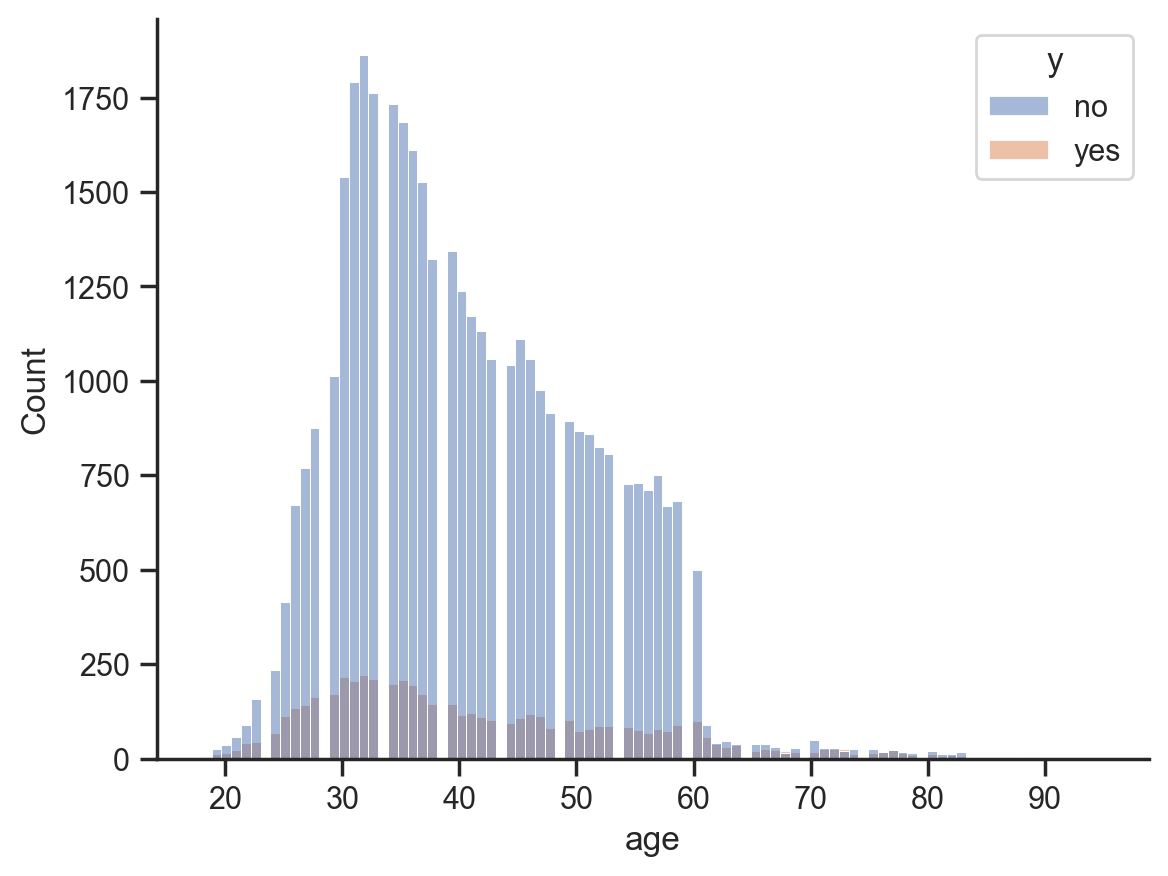

In [21]:
sns.histplot(data=df, x='age', hue='y');

#### 2.4.3.2. `balance` Factor

The `balance` feature holds significant importance in predicting whether a client will subscribe to a term deposit or not. This variable plays a crucial role in influencing the subscription outcome. Understanding the distribution and patterns within the `balance` feature can provide valuable insights into customer behavior and their likelihood to subscribe. 

I will analyze the variations in `balance` across different categories and its relationship with the target variable:

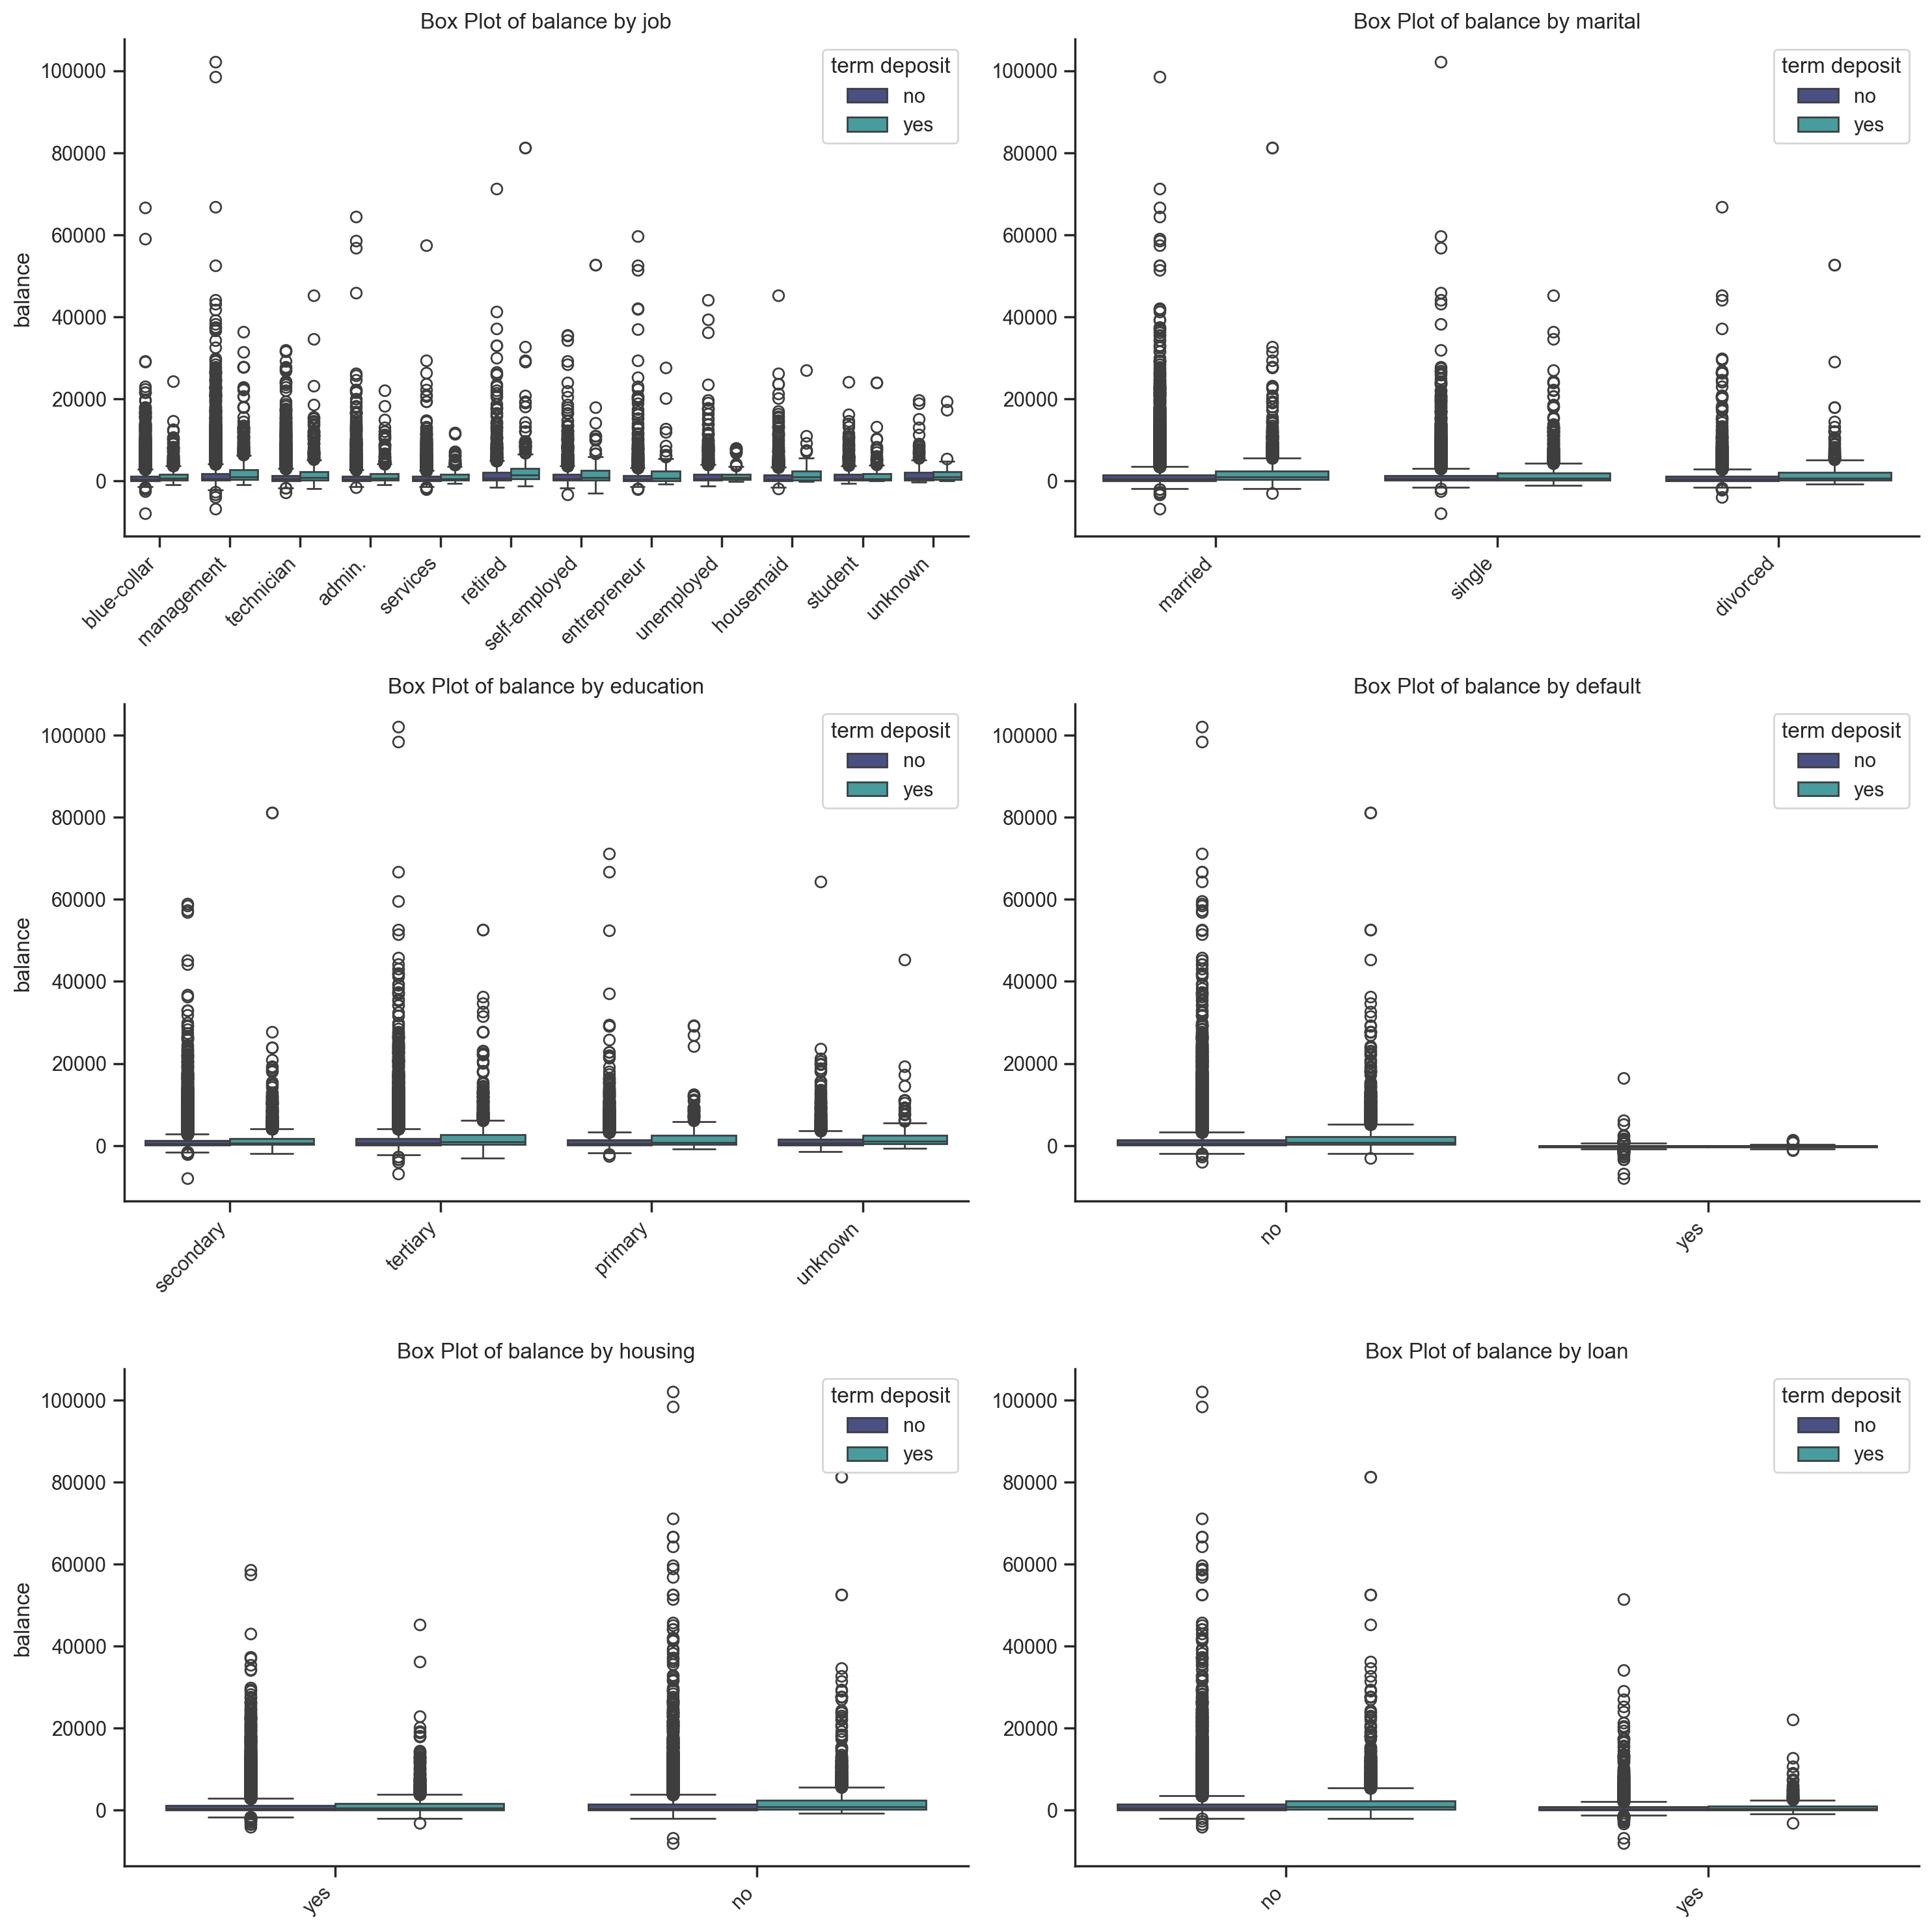

In [22]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']

num_rows = len(categorical_features) // 2 + len(categorical_features) % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    if feature == 'month':
        order = order_month
    else:
        order = df[feature].value_counts().index 
        
    sns.boxplot(data=df, x=feature, y='balance', hue='y', ax=ax, palette='mako', order=order)
    ax.set_title(f'Box Plot of balance by {feature}')
    ax.set_xlabel('')
    
    if i % 2 == 1:
        ax.set_ylabel('')
        
    ax.legend(title='term deposit')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout();

**Note:**
- When considering groups defined by features like `default`, `housing`, and `loan`, individuals without default status and without a loan tend to have higher account balances. Moreover, this group is also more inclined to subscribe to the term deposit, indicating a potential relationship between financial stability and subscription likelihood.

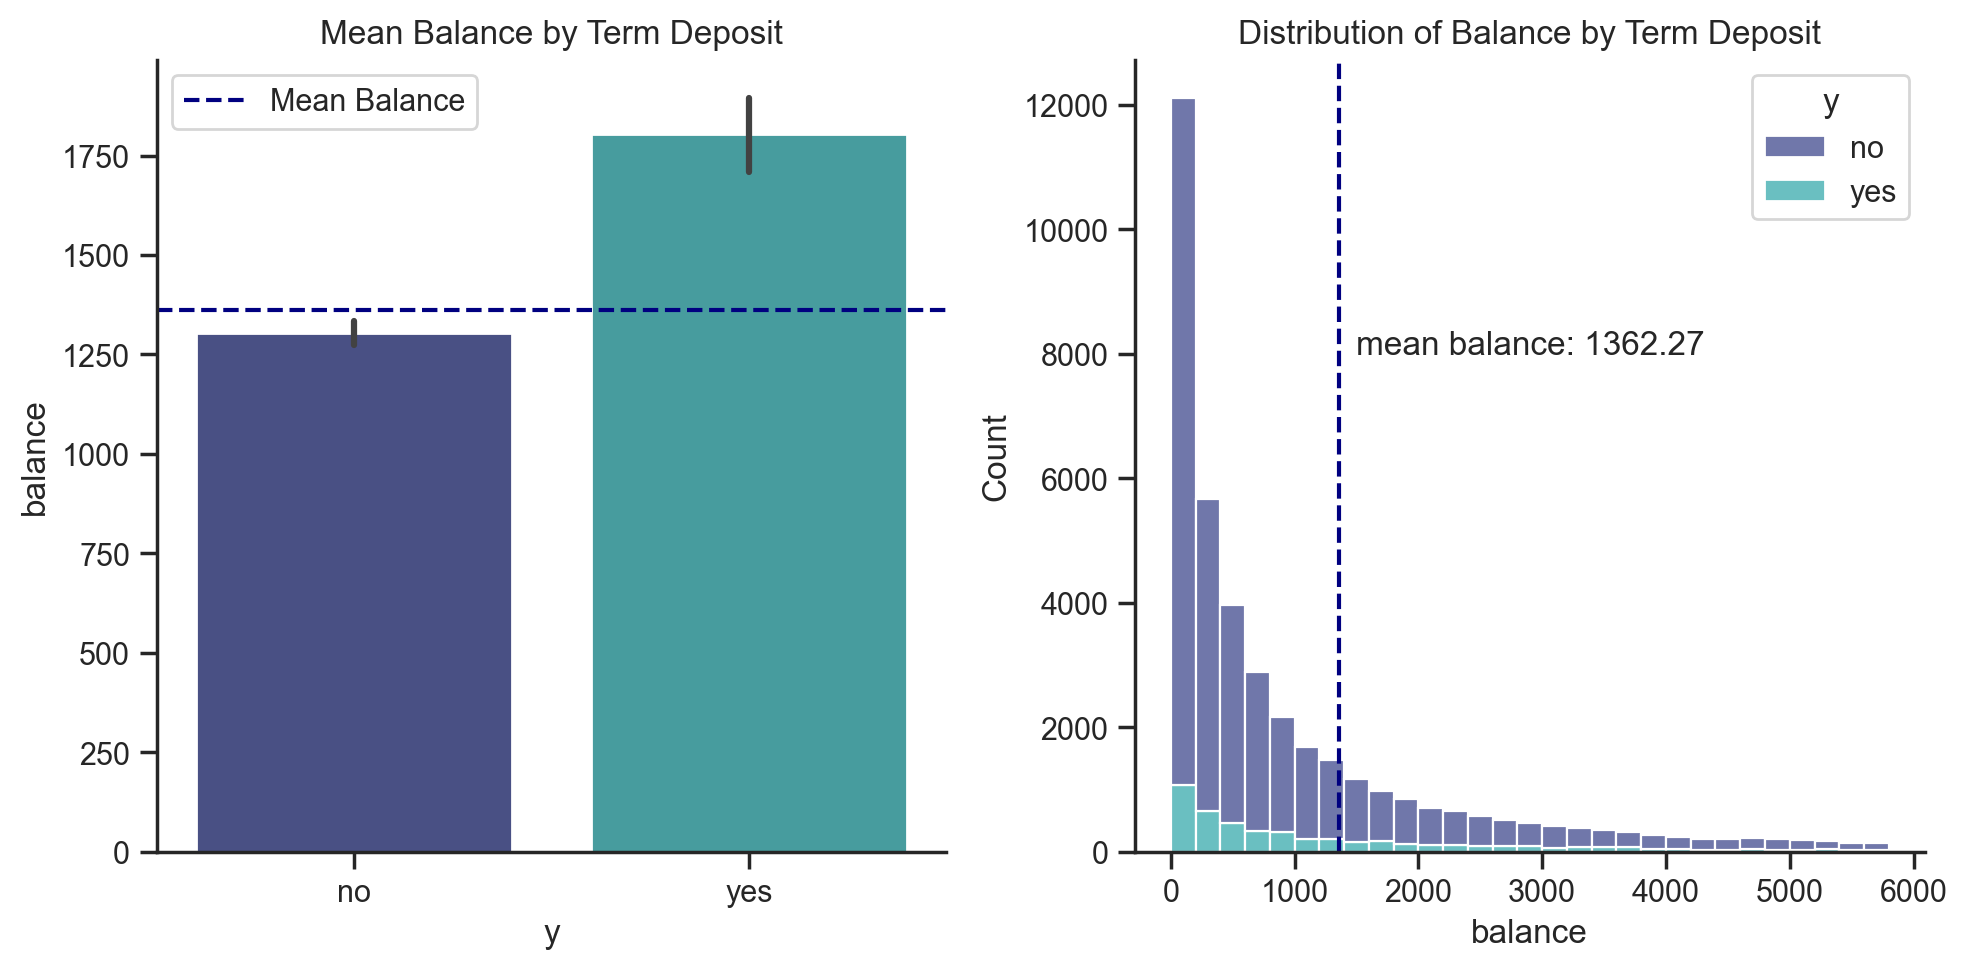

In [23]:
plt.figure(figsize=(10,5))

mean_balance = df['balance'].mean()

# First subplot: Bar plot of balance by term deposit
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='y', y='balance', palette='mako')
plt.axhline(mean_balance, label='Mean Balance', linestyle='--', color='navy')
plt.legend()
plt.title('Mean Balance by Term Deposit');

# Second subplot: Histogram plot of balance with hue='y'
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='balance', hue='y', multiple='stack', bins=range(0,6000,200), palette='mako')
plt.axvline(mean_balance, label='Mean Balance', linestyle='--', color='navy')
plt.title('Distribution of Balance by Term Deposit')
plt.text(1500, 8000, f"mean balance: {mean_balance:.2f}")
plt.tight_layout();

In [24]:
df[df['balance'] > mean_balance]['y'].value_counts(normalize=True)

y
no    0.84
yes   0.16
Name: proportion, dtype: float64

In [25]:
df[df['balance'] < mean_balance]['y'].value_counts(normalize=True)

y
no    0.90
yes   0.10
Name: proportion, dtype: float64

**Note:**

- **The bar chart:** Customers who respond positively to the term deposit tend to possess higher account balances, surpassing the average balance across the entire dataset. This suggests a potential correlation between larger account balances and a higher likelihood of subscribing to the term deposit.
- **The histogram:** While the difference in success rates between customers with higher balances and those with lower balances is apparent, the magnitude of this difference may not be as significant as anticipated.
- When examining the distribution of account balances split by term deposit response and calculating the success rate as a percentage of clients who responded positively, we find that the increase in success rate for customers with balances exceeding the mean balance of 1362 euros is relatively moderate – **merely 6% higher than the 10% success rate of balances below the mean**.

#### 2.4.3.3. `duration` factor

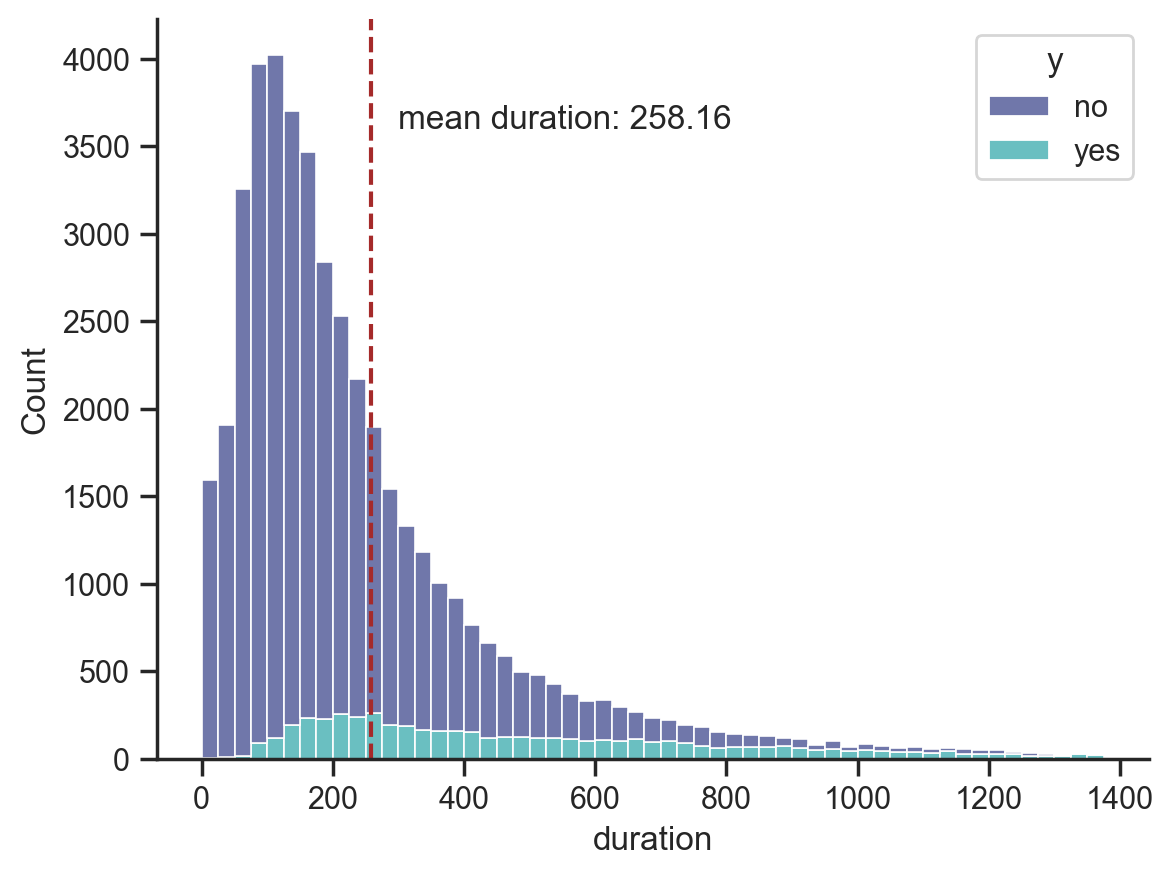

In [26]:
duration_mean = df['duration'].mean()
sns.histplot(data=df, x='duration', hue='y', bins=range(0,1400,25), multiple='stack', palette='mako')
plt.axvline(duration_mean, linestyle='--', label='Mean', color='brown')
plt.text(300, 3600, f'mean duration: {duration_mean:.2f}');

**Note;**

The distribution of `duration` concerning term deposits reveals intriguing patterns. When examining the distribution among clients who responded with 'no,' a right-skewed curve is evident. This implies that a substantial number of clients who decline the term deposit tend to do so around the median duration value.

On the other hand, for clients who responded with 'yes,' the distribution is similarly right-skewed, but the tail extends significantly. This suggests that as the duration of the call increases, the likelihood of a client subscribing to the term deposit also increases. Notably, there are instances of outliers on the lower end of the duration spectrum, indicating that clients engaged in conversations lasting over 700 seconds are more inclined to subscribe.

While the histogram for 'no' responses experiences a sharp decline, the histogram for 'yes' responses remains relatively stable. This implies that the bank can effectively target individuals who engage in conversations exceeding the average duration.

In summary, these insights underscore the noteworthy influence of call duration on the decision to subscribe. Prolonged conversations tend to correlate with a higher likelihood of a positive outcome.

Term Deposit Rate with `duration` under mean value:

In [27]:
df[df['duration'] > duration_mean]['y'].value_counts(normalize=True).to_frame(name='deposit rate')

deposit rate
y                
no           0.75
yes          0.25

Term Deposit Rate with `duration` above mean value:

In [28]:
df[df['duration'] < duration_mean]['y'].value_counts(normalize=True).to_frame(name='deposit rate')

deposit rate
y                
no           0.95
yes          0.05

Term Deposit Rate with `duration` above 700 second:

In [29]:
df[df['duration'] > 700]['y'].value_counts(normalize=True).to_frame(name='deposit rate')

deposit rate
y                
yes          0.53
no           0.47

**Note:**

The subscription rate for term deposits displays significant variability based on call duration:

- If the call duration is greater than the mean duration of 258 seconds, the success rate of subscription is 25%.
- Conversely, if the call duration is less than the mean duration of 258 seconds, the success rate of subscription drops to 5%.
- Notably, if the call duration exceeds 700 seconds, the success rate of subscription notably increases to 53%.

This indicates that for every 1000 customers the bank contacts:

- If the call duration is shorter than the mean, around 128 individuals may subscribe to the term deposit.
- If the call duration is longer than the mean, approximately 350 individuals might subscribe.
- If the call duration surpasses 700 seconds, around 590 individuals could show interest in subscribing.

These figures emphasize the substantial influence of call duration on subscription outcomes and underline the importance of efficiently managing call interactions to optimize subscription rates.

### 2.4.3.4. Class Imbalance check

In [30]:
df['y'].value_counts(normalize=True).to_frame()

proportion
y              
no         0.88
yes        0.12

The dataset exhibits a notable class imbalance in terms of the target variable 'y':

- **No**: Approximately 88% of clients did not subscribe to the term deposit.
- **Yes**: Only around 12% of clients chose to subscribe.

This class imbalance is a common scenario in real-world datasets, and it presents a challenge for building predictive models. However, in this context, straightforward approaches like downsampling the majority class or upsampling the minority class might not be the best solution. The reason lies in the fact that the **conversion rate of clients subscribing to the term deposit is inherently low**.

In cases where the positive outcome is rare and the conversion rate is low, aggressive resampling methods can potentially introduce noise into the data and lead to overfitting. Therefore, a more nuanced strategy is required. Instead of focusing solely on balancing the class distribution, the emphasis should be on developing models that can accurately capture the patterns within this imbalanced dataset.

Efforts should be directed towards feature engineering, model selection, and performance evaluation metrics that are tailored to the business problem at hand. 

# Part 3: Classification Model

Let's dive into these preprocessing steps to prepare the data for building and evaluating our classification model.

## 3.1. Data Encoding
#### Label Encoding for Binary Variables:

In [31]:
df_model = df.copy()

In [32]:
binary_cols = ['default', 'housing', 'loan', 'y']

for col in binary_cols:
    df_model[col] = np.where(df_model[col] =='yes', 1, 0)


#### One Hot Encoding for Other Categorical Variables:

In [33]:
other_categorical_cols = ['job', 'marital', 'education', 'contact', 'poutcome']

for col in other_categorical_cols:
    df_model = pd.get_dummies(df_model, columns=[col], prefix=[col])

In [34]:
df_model.head()

age  default  balance  housing  loan  day  month  duration  campaign  \
0   58        0     2143        1     0    5      5       261         1   
1   44        0       29        1     0    5      5       151         1   
2   33        0        2        1     1    5      5        76         1   
3   47        0     1506        1     0    5      5        92         1   
4   33        0        1        0     0    5      5       198         1   

   pdays  previous  y  job_admin.  job_blue-collar  job_entrepreneur  \
0     -1         0  0       False            False             False   
1     -1         0  0       False            False             False   
2     -1         0  0       False            False              True   
3     -1         0  0       False             True             False   
4     -1         0  0       False            False             False   

   job_housemaid  job_management  job_retired  job_self-employed  \
0          False            True        False              False   
1          False           False        False              False   
2          False           False        False              False   
3          False           False        False              False   
4          False           False        False              False   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0         False        False           False           False        False   
1         False        False            True           False        False   
2         False        False           False           False        False   
3         False        False           False           False        False   
4         False        False           False           False         True   

   marital_divorced  marital_married  marital_single  education_primary  \
0             False             True           False              False   
1             False            False            True              False   
2             False             True           False              False   
3             False             True           False              False   
4             False            False            True              False   

   education_secondary  education_tertiary  education_unknown  \
0                False                True              False   
1                 True               False              False   
2                 True               False              False   
3                False               False               True   
4                False               False               True   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0             False              False             True             False   
1             False              False             True             False   
2             False              False             True             False   
3             False              False             True             False   
4             False              False             True             False   

   poutcome_other  poutcome_success  poutcome_unknown  
0           False             False              True  
1           False             False              True  
2           False             False              True  
3           False             False              True  
4           False             False              True

## 3.2. Split and Scale Data

In [35]:
X = df_model.drop(columns=['y']).copy()
y = df_model['y'].copy()

features = X.columns.to_list()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    stratify=y, 
                                                    random_state=42)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((33908, 37), (11303, 37), (33908,), (11303,))

Now the preprocessing part is done, let's build classification models for the task:

## 3.3. Set Baseline

### 3.3.1. Create function

To establish a solid foundation, we will create three essential functions that will be utilized iteratively throughout the model building:

- The **`evaluate_model`** function will be responsible for displaying various scoring metrics to assess model performance.
- The **`conf_matrix_plot`** function will allow for clear visualization of the confusion matrix.
- The **`plot_top_features`** function will facilitate the visualization of the top feature importances.

These functions will serve as valuable tools in evaluating and presenting the results of our analysis and modeling efforts.

In [39]:
def evaluate_model(model_name, model_object, x_train, y_train, x_test, y_test, cv=True):
    if cv:
        # Training for GridSearchCV
        cv_results = pd.DataFrame(model_object.cv_results_)
        best_idx = cv_results['mean_test_f1'].idxmax()
        best_estimator_results = cv_results.iloc[best_idx, :]

        f1_train = best_estimator_results['mean_test_f1']
        recall_train = best_estimator_results['mean_test_recall']
        precision_train = best_estimator_results['mean_test_precision']
        accuracy_train = best_estimator_results['mean_test_accuracy']
    else:
        # Training for single model
        model_object.fit(x_train, y_train)
        y_train_preds = model_object.predict(x_train)
        
        f1_train = f1_score(y_train, y_train_preds)
        recall_train = recall_score(y_train, y_train_preds)
        precision_train = precision_score(y_train, y_train_preds)
        accuracy_train = accuracy_score(y_train, y_train_preds)

    # Testing
    y_test_preds = model_object.predict(x_test)
    f1_test = f1_score(y_test, y_test_preds)
    recall_test = recall_score(y_test, y_test_preds)
    precision_test = precision_score(y_test, y_test_preds)
    accuracy_test = accuracy_score(y_test, y_test_preds)

    # Store result in df
    train_scores = pd.DataFrame({
        'Model': [model_name],
        'F1': [f1_train],
        'Recall': [recall_train],
        'Precision': [precision_train],
        'Accuracy': [accuracy_train],
        'Data': ['Train']
    })

    test_scores = pd.DataFrame({
        'Model': [model_name],
        'F1': [f1_test],
        'Recall': [recall_test],
        'Precision': [precision_test],
        'Accuracy': [accuracy_test],
        'Data': ['Test']
    })

    combined_scores = pd.concat([train_scores, test_scores], ignore_index=True)
    return combined_scores

def conf_matrix_plot(model_name, model_object, x_data, y_data):
    plt.figure(figsize=(4,4))
    model_pred = model_object.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model_object.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_object.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} Model confusion matrix");
    
def plot_top_features(feature_importances, model_name, feature_names, n=10):
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    top_features = importance_df.head(n)
    plt.figure(figsize=(8, 4))
    sns.barplot(data=top_features, x='Importance', y='Feature', palette='mako')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {n} Features of model {model_name}')
    sns.despine();

### 3.3.2. Set up baseline model

**A baseline model** serves as a fundamental starting point for evaluating the performance of more complex models. It provides a simple and often naive way to make predictions, and its performance metrics can serve as a reference point for assessing the effectiveness of more advanced models.

In this project, we will establishe a baseline model using the `DummyClassifier` from scikit-learn. The `DummyClassifier` is a basic classifier that makes predictions based on simple rules, such as random guessing or always predicting the most frequent class. 

In [40]:
baseline = DummyClassifier(strategy='stratified', random_state=42)
baseline.fit(X_train_scaled, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [41]:
baseline_result = evaluate_model('Baseline Model', baseline, X_train_scaled, y_train, X_test_scaled, y_test, cv=False)
baseline_result

Model   F1  Recall  Precision  Accuracy   Data
0  Baseline Model 0.12    0.12       0.12      0.79  Train
1  Baseline Model 0.11    0.11       0.11      0.79   Test

<Figure size 400x400 with 0 Axes>

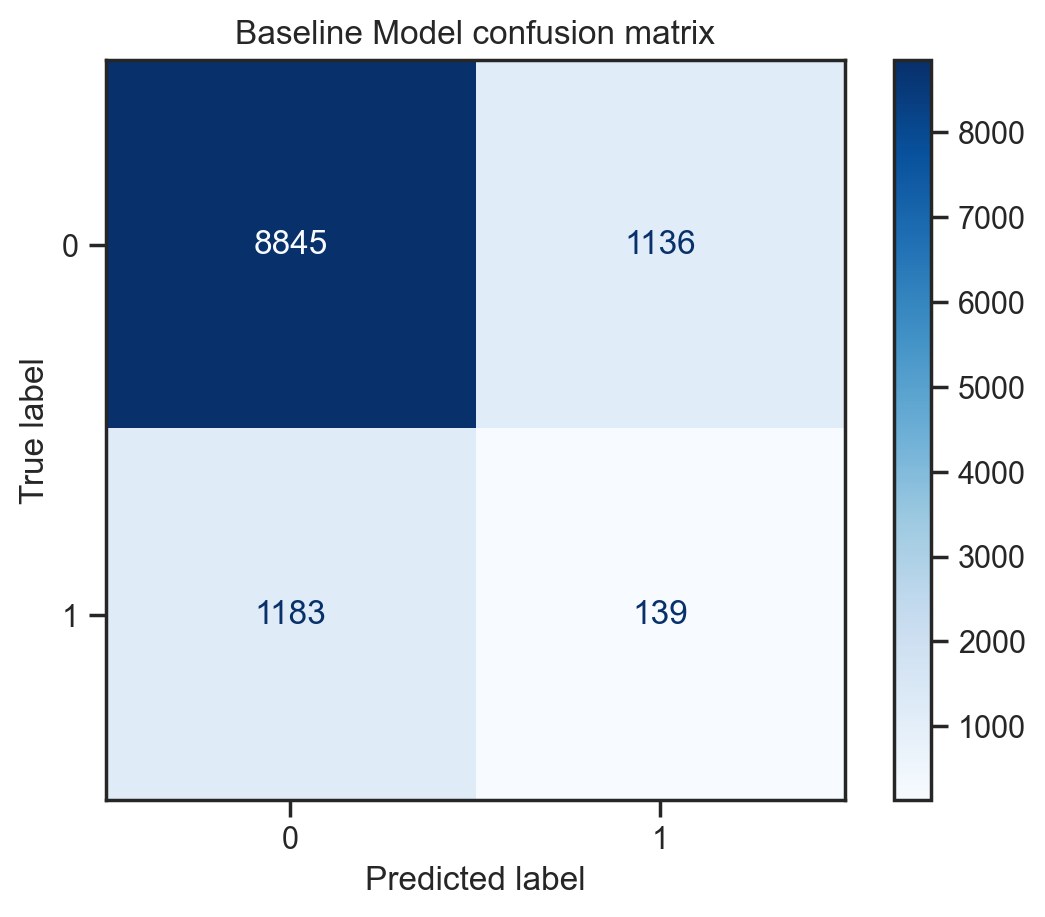

In [42]:
plt.rcParams["axes.spines.right"] = True
plt.rcParams["axes.spines.top"] = True

conf_matrix_plot('Baseline', baseline, X_test_scaled, y_test)

## 3.4. Build Models

During this session, I will employ a **Decision Tree** as a white-box model. This choice aims to enhance our comprehension of the underlying mechanisms. Additionally, I will utilize **Random Forest** and **XGBoost** as black-box models, leveraging their complexity for optimal performance and outcomes. This approach is geared towards achieving the most favorable results across different model types.

**Decision Tree:**
- Intuitive and interpretable.
- Builds a tree by recursively partitioning feature space based on informative features.
- Each internal node represents a decision based on a feature, leading to a predicted class at leaf nodes.
- Prone to overfitting, but can be controlled through hyperparameter tuning.

**Random Forest:**
- Ensemble method combining multiple decision trees' predictions.
- Reduces overfitting by training each tree on a random subset of data and features.
- Final prediction is an average or majority vote of individual tree predictions.
- Offers robust performance and improved generalization.

**XGBoost:**
- Ensemble technique that builds an ensemble of weak learners (often decision trees).
- Uses gradient boosting to optimize the loss function iteratively.
- Regularization techniques prevent overfitting and handle missing data effectively.
- High predictive accuracy but sacrifices interpretability for performance.


### 3.4.1. Decision Tree
#### Model Initialization

In [43]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
tree_result = evaluate_model('Tree', tree, X_train_scaled, y_train, X_test_scaled, y_test, cv=False)
tree_result

Model   F1  Recall  Precision  Accuracy   Data
0  Tree 1.00    1.00       1.00      1.00  Train
1  Tree 0.48    0.47       0.48      0.88   Test

<Figure size 400x400 with 0 Axes>

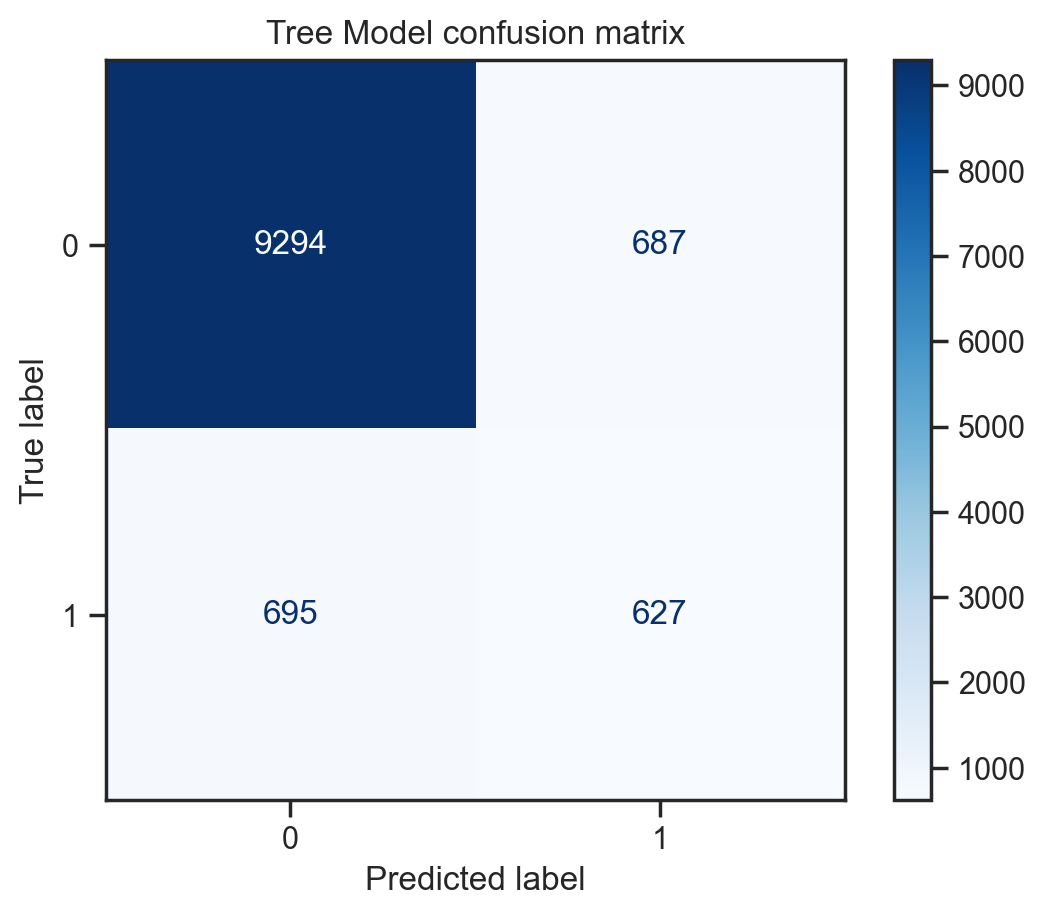

In [45]:
conf_matrix_plot('Tree', tree, X_test_scaled, y_test);

We've observed that the unoptimized decision tree model exhibits signs of overfitting to the training data, emphasizing the necessity for hyperparameter tuning. Yet, the result with Decision Tree is much better than our baseline.

Now, I aim to fine-tune the model's parameters, mitigating the overfitting issue and achieving improved generalization performance on unseen data:

#### Hyperparameter Tuning

In [46]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 15, 20],
    'class_weight': [None, 'balanced', {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}]
}

scoring = ['f1', 'recall', 'precision', 'accuracy']

tree_cv = GridSearchCV(
    tree, 
    tree_params, 
    scoring=scoring, 
    cv=5, 
    refit='f1', 
    n_jobs=-1, 
    verbose=True
)


In [47]:
%%time
tree_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
CPU times: total: 1min 8s
Wall time: 10min 19s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced', {0: 0.2, 1: 0.8},
                                          {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20, 25]},
             refit='f1', scoring=['f1', 'recall', 'precision', 'accuracy'],
             verbose=True)

In [48]:
tree_cv.best_params_

{'class_weight': {0: 0.3, 1: 0.7},
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 2}

After thorough hyperparameter tuning, we have identified the optimal parameters for our decision tree model:

- `class_weight`: {0: 0.3, 1: 0.7}
- `criterion`: 'entropy'
- `max_depth`: 10
- `min_samples_leaf`: 20
- `min_samples_split`: 2

These parameters were selected based on a careful evaluation of various combinations to ensure the best possible performance of our model in predicting whether a client subscribes to a term deposit. These parameter settings were found to yield the highest accuracy and overall effectiveness in capturing the underlying patterns in the data while mitigating overfitting.

#### Result Evaluation

In [49]:
tree_tuned_result = evaluate_model('Tree Tuned CV', tree_cv, X_train_scaled, y_train, X_test_scaled, y_test, cv=True)
tree_tuned_result

Model   F1  Recall  Precision  Accuracy   Data
0  Tree Tuned CV 0.58    0.70       0.50      0.88  Train
1  Tree Tuned CV 0.58    0.67       0.50      0.88   Test

<Figure size 400x400 with 0 Axes>

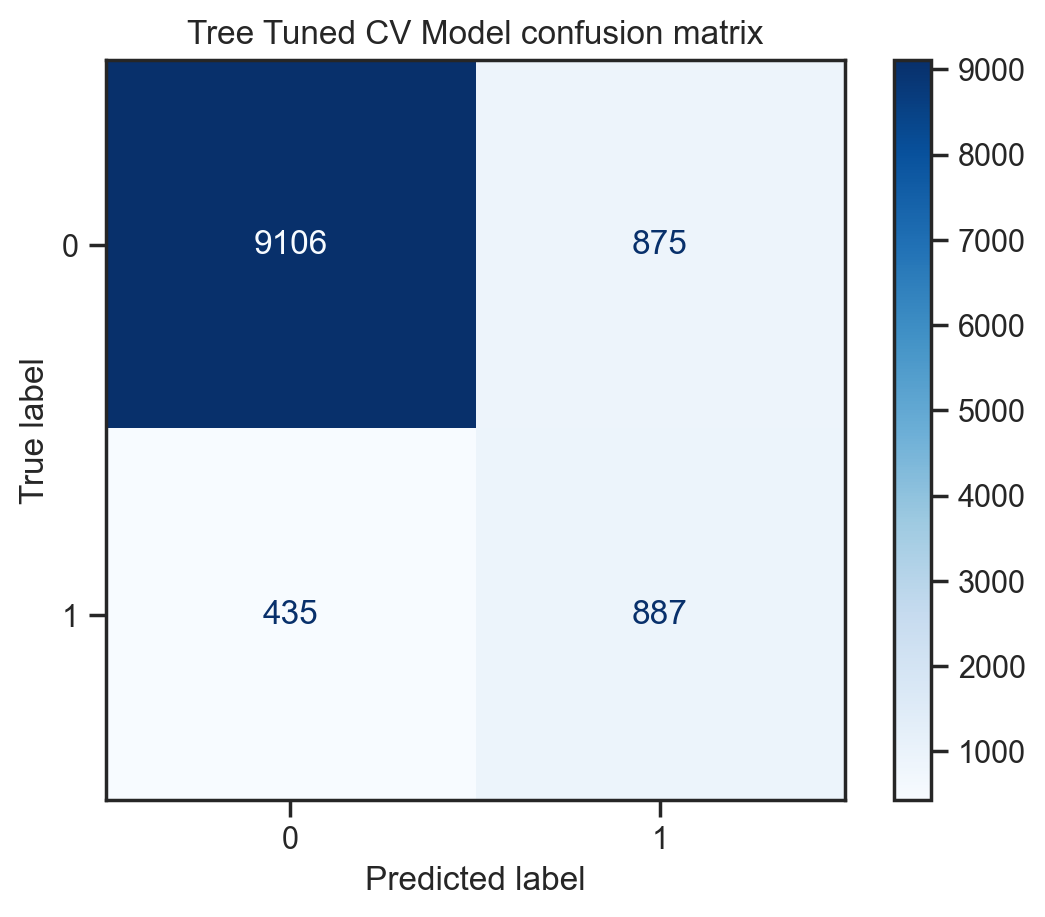

In [50]:
conf_matrix_plot('Tree Tuned CV', tree_cv, X_test_scaled, y_test);

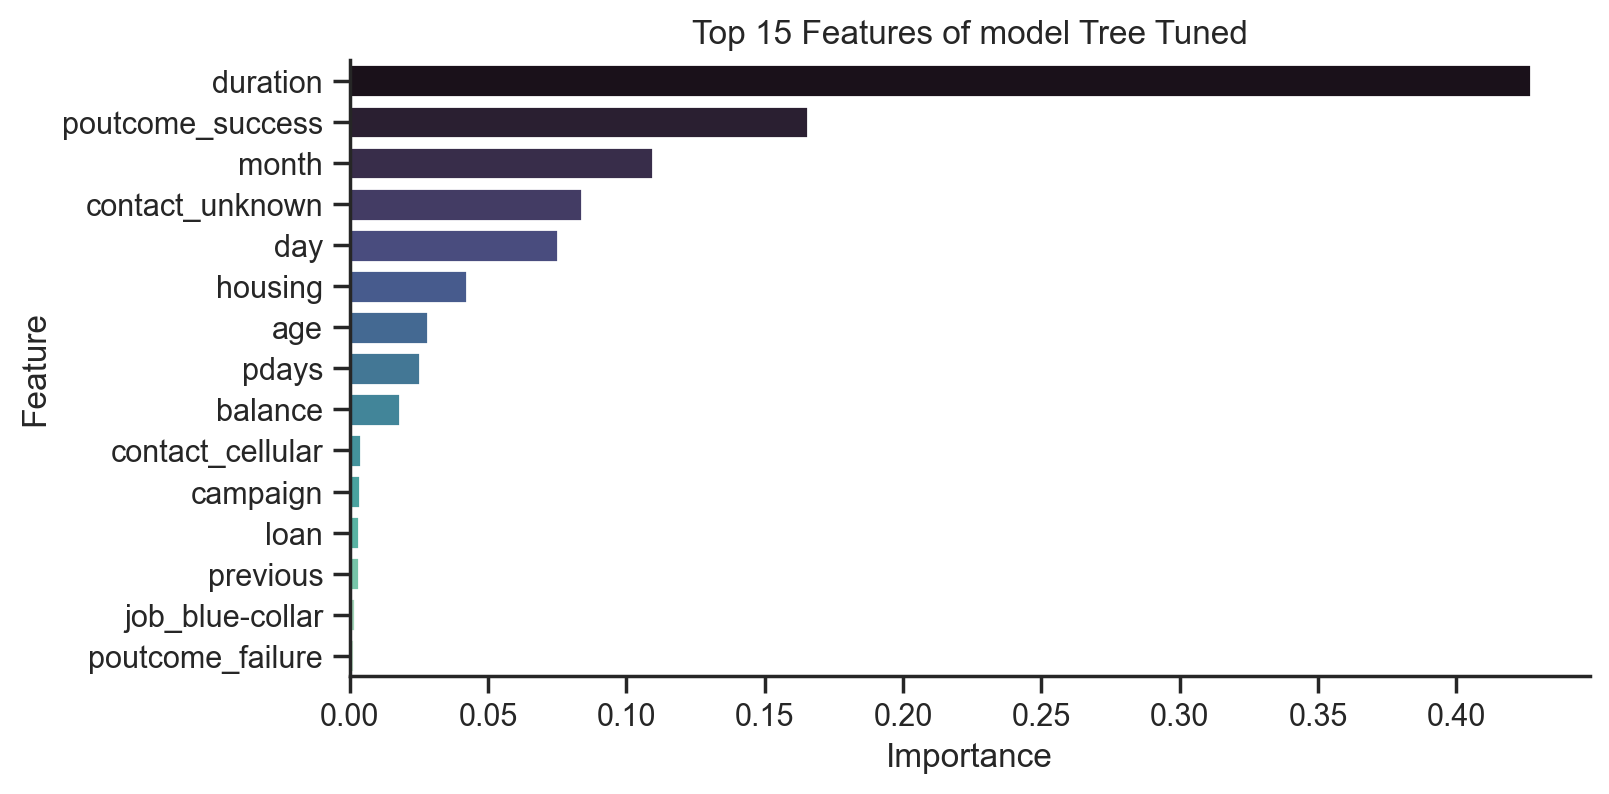

In [51]:
plot_top_features(tree_cv.best_estimator_.feature_importances_, 'Tree Tuned', features, n=15)

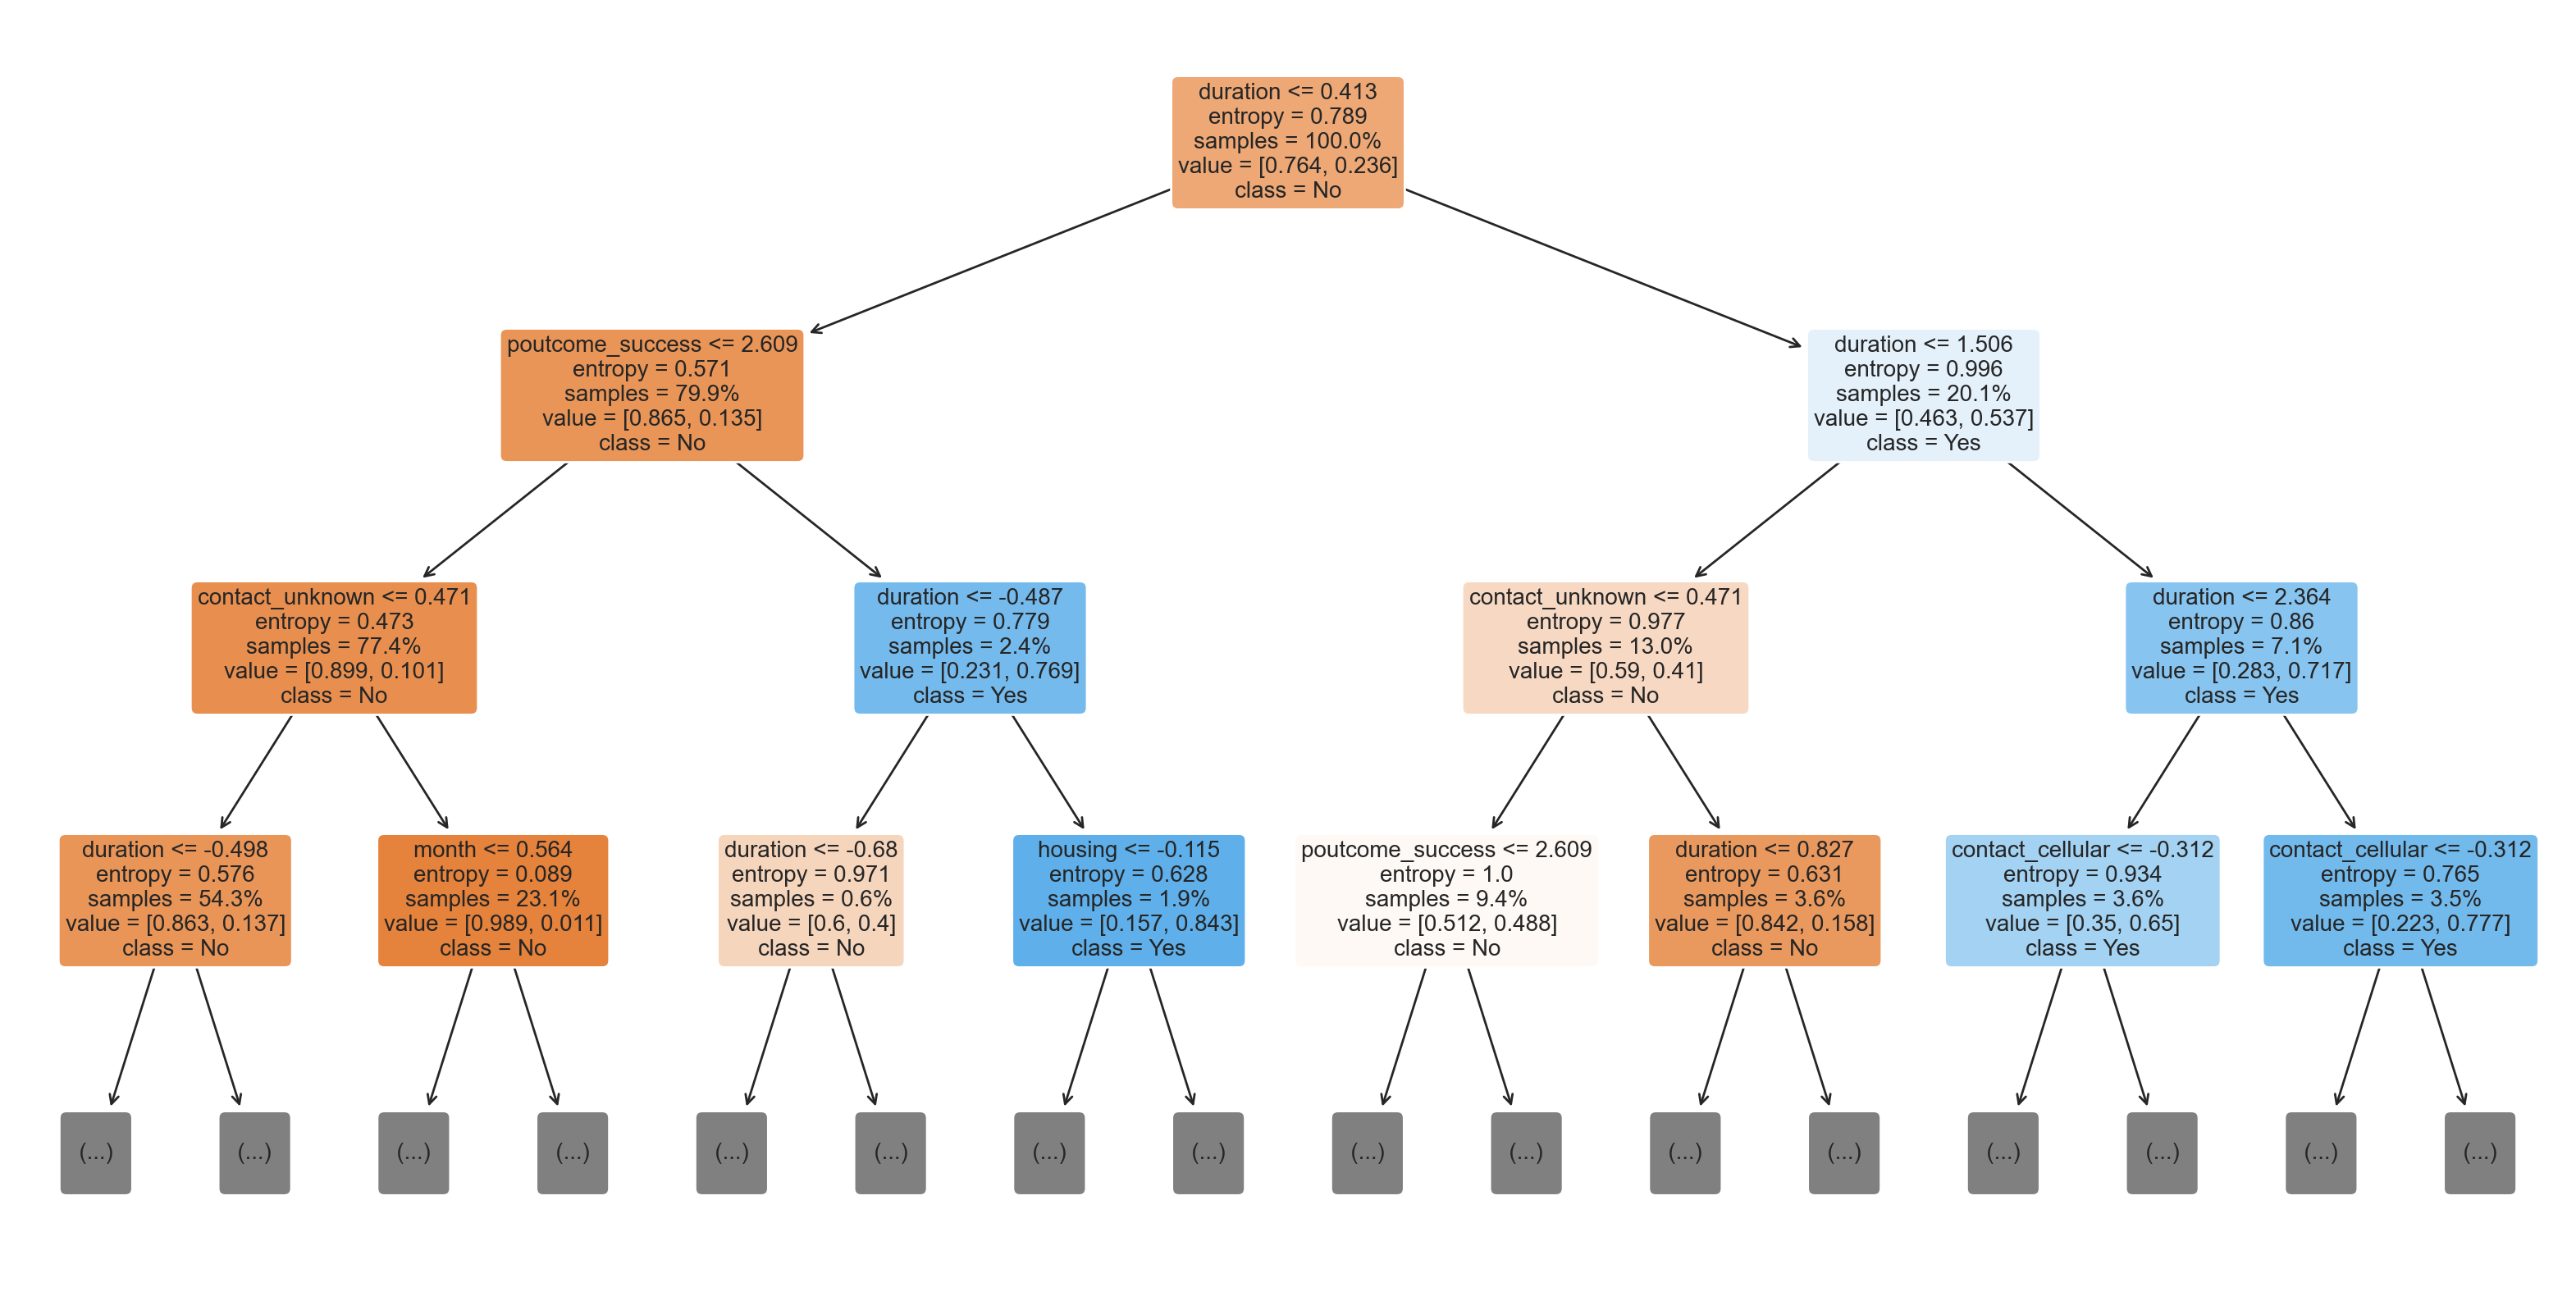

In [52]:
plt.figure(figsize=(20,10))
plot_tree(
    tree_cv.best_estimator_, 
    max_depth=3,
    filled=True, 
    rounded=True, 
    class_names=['No', 'Yes'], 
    feature_names = features, 
    proportion=True,
    fontsize=10
);

### 3.4.2. Random Forest
#### Model Initialization

In [53]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [54]:
forest_result = evaluate_model('Forest', rf, X_train_scaled, y_train, X_test_scaled, y_test, cv=False)
forest_result

Model   F1  Recall  Precision  Accuracy   Data
0  Forest 1.00    1.00       1.00      1.00  Train
1  Forest 0.47    0.37       0.67      0.90   Test

<Figure size 400x400 with 0 Axes>

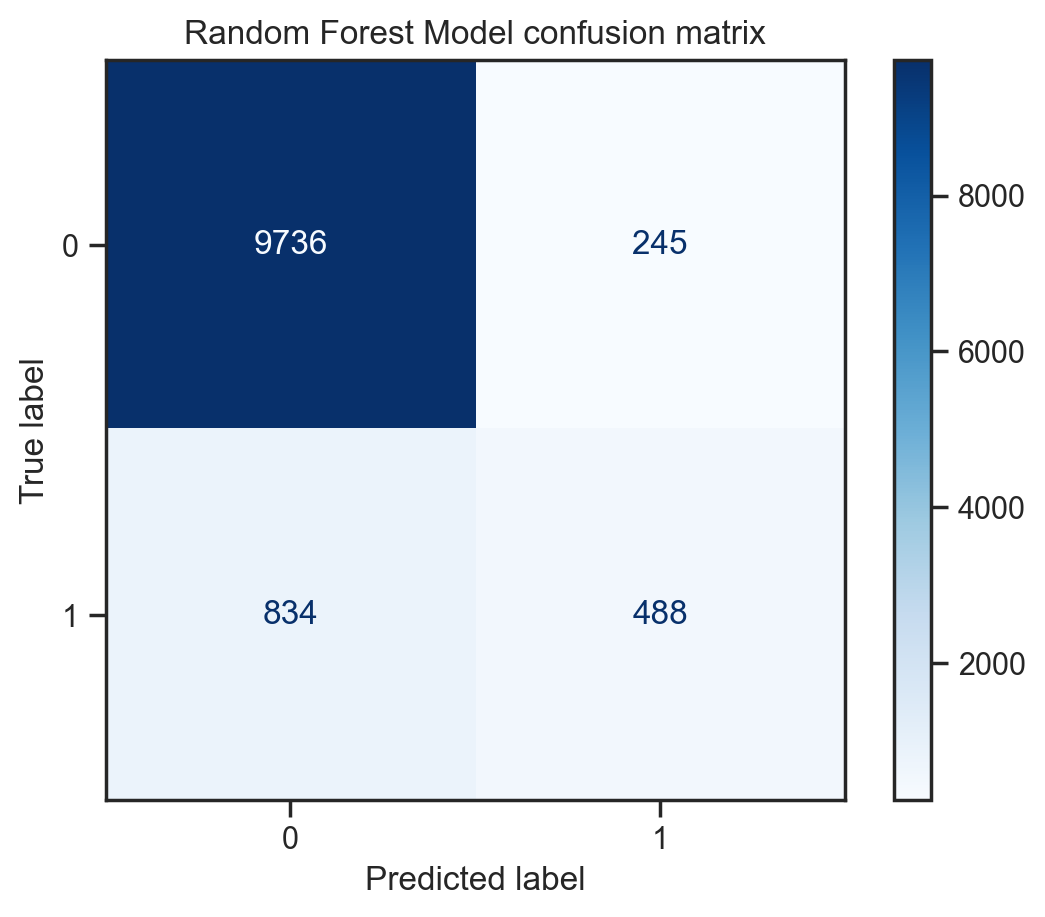

In [55]:
conf_matrix_plot('Random Forest', rf, X_test_scaled, y_test);

#### Hyperparameter Tuning

In [56]:
forest_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 8, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 5, 10],
    'max_features':['sqrt', 0.5, 0.8],
    'class_weight': [None, 'balanced', {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}]
}

scoring = ['accuracy', 'precision', 'recall', 'f1']

rf_cv = GridSearchCV(
    rf, 
    forest_params, 
    scoring=scoring, 
    cv=5, 
    refit='f1', 
    n_jobs=-1, 
    verbose=True
) 

In [57]:
%%time
rf_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1215 candidates, totalling 6075 fits
CPU times: total: 1min 1s
Wall time: 3h 23s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced', {0: 0.2, 1: 0.8},
                                          {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}],
                         'max_depth': [None, 8, 15],
                         'max_features': ['sqrt', 0.5, 0.8],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 150, 200]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=True)

In [58]:
rf_cv.best_params_

{'class_weight': {0: 0.2, 1: 0.8},
 'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 150}

After extensive hyperparameter tuning, the Random Forest model yielded the best results with the following set of hyperparameters:

- `class_weight`: {0: 0.2, 1: 0.8}
- `max_depth`: None
- `max_features`: 0.5
- `min_samples_leaf`: 5
- `min_samples_split`: 15
- `n_estimators`: 150


#### Result Evaluation

In [59]:
forest_tuned_result = evaluate_model('Forest Tuned CV', rf_cv, X_train_scaled, y_train, X_test_scaled, y_test, cv=True)
forest_tuned_result

Model   F1  Recall  Precision  Accuracy   Data
0  Forest Tuned CV 0.62    0.71       0.56      0.90  Train
1  Forest Tuned CV 0.62    0.71       0.56      0.90   Test

<Figure size 400x400 with 0 Axes>

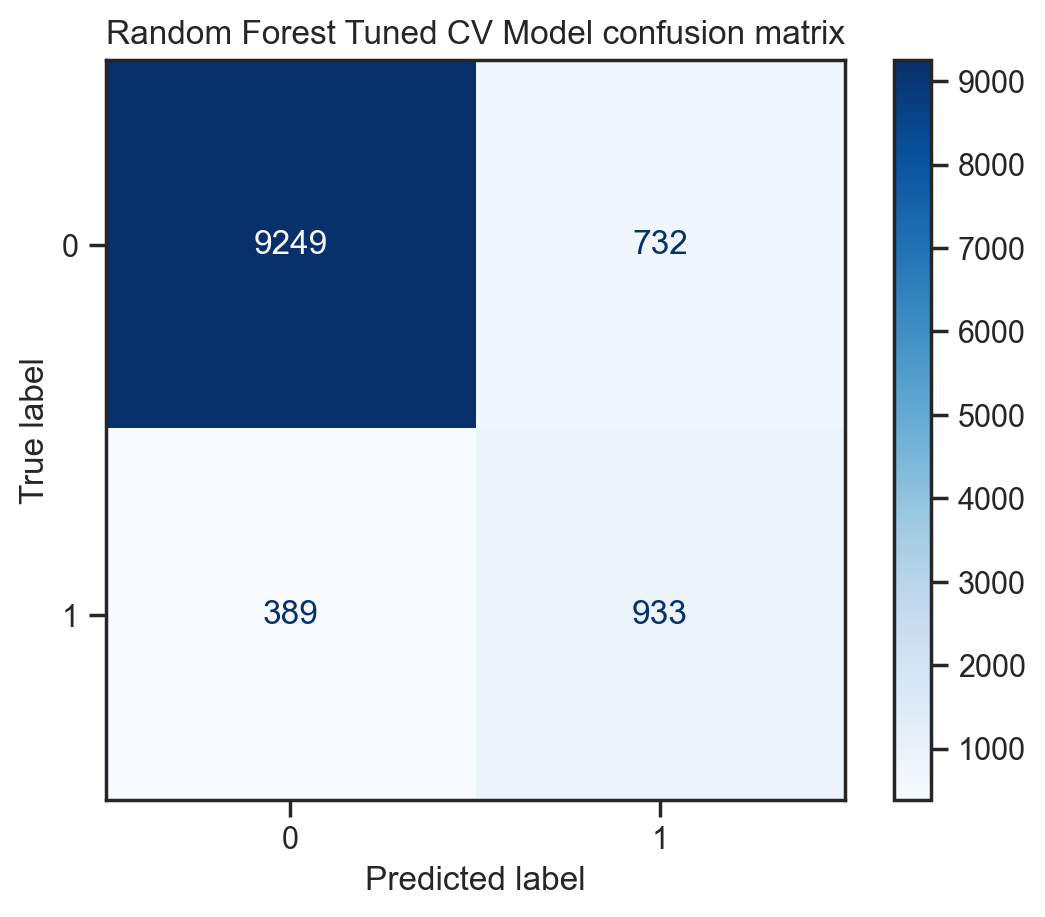

In [60]:
conf_matrix_plot('Random Forest Tuned CV', rf_cv, X_test_scaled, y_test);

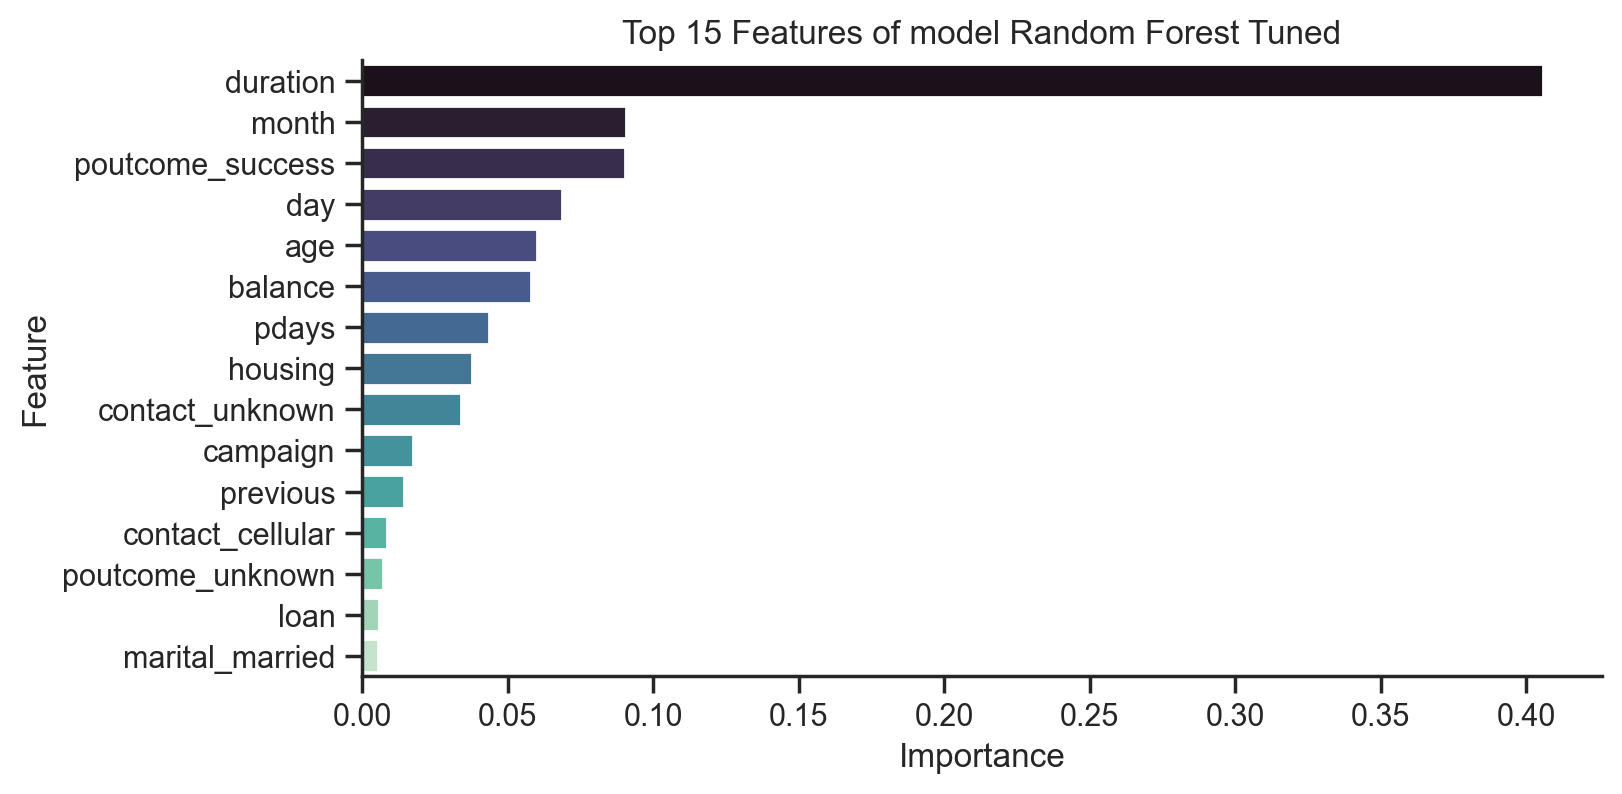

In [61]:
plot_top_features(rf_cv.best_estimator_.feature_importances_, 'Random Forest Tuned', features, n=15)

### 3.4.3. XGBoost
#### Model Initialization

In [62]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [63]:
xgb_result = evaluate_model('XGBoost', xgb, X_train_scaled, y_train, X_test_scaled, y_test, cv=False)
xgb_result

Model   F1  Recall  Precision  Accuracy   Data
0  XGBoost 0.81    0.74       0.89      0.96  Train
1  XGBoost 0.55    0.48       0.64      0.91   Test

<Figure size 400x400 with 0 Axes>

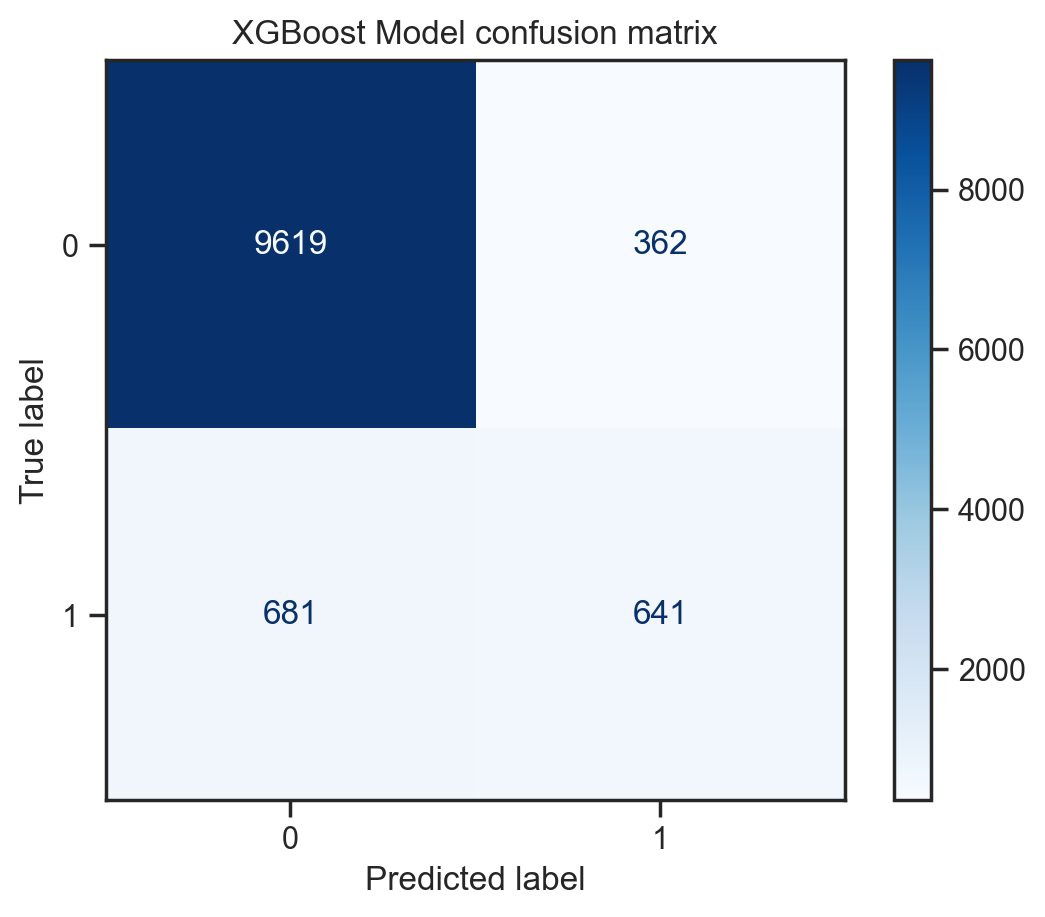

In [64]:
conf_matrix_plot('XGBoost', xgb, X_test_scaled, y_test)

#### Hyperparameter Tuning

In [65]:
xgb_params = {
    'max_depth': [None, 5, 10, 15], 
    'min_child_weight': [3, 5, 7, 10],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'n_estimators': [150, 200, 300],
    
}    

scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv = GridSearchCV(
    xgb, 
    xgb_params, 
    scoring=scoring, 
    cv=5, 
    refit='f1', 
    n_jobs=-1, 
    verbose=True
)

In [66]:
%%time
xgb_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
CPU times: total: 11.6 s
Wall time: 3min 45s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'max_depth': [None, 5, 10, 15],
                         'min_child_weight': [3, 5, 7, 10],
                         'n_estimators': [150, 200, 300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=True)

In [67]:
xgb_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': None,
 'min_child_weight': 5,
 'n_estimators': 150}

Optimized hyperparameters:

- `learning_rate`: 0.2
- `max_depth`: None
- `min_child_weight`: 10
- `n_estimators`: 200

#### Result Evaluation

In [68]:
xgb_tuned_result = evaluate_model('XGBoost Tuned CV', xgb_cv, X_train_scaled, y_train, X_test_scaled, y_test, cv=True)
xgb_tuned_result

Model   F1  Recall  Precision  Accuracy   Data
0  XGBoost Tuned CV 0.56    0.50       0.65      0.91  Train
1  XGBoost Tuned CV 0.54    0.47       0.63      0.91   Test

<Figure size 400x400 with 0 Axes>

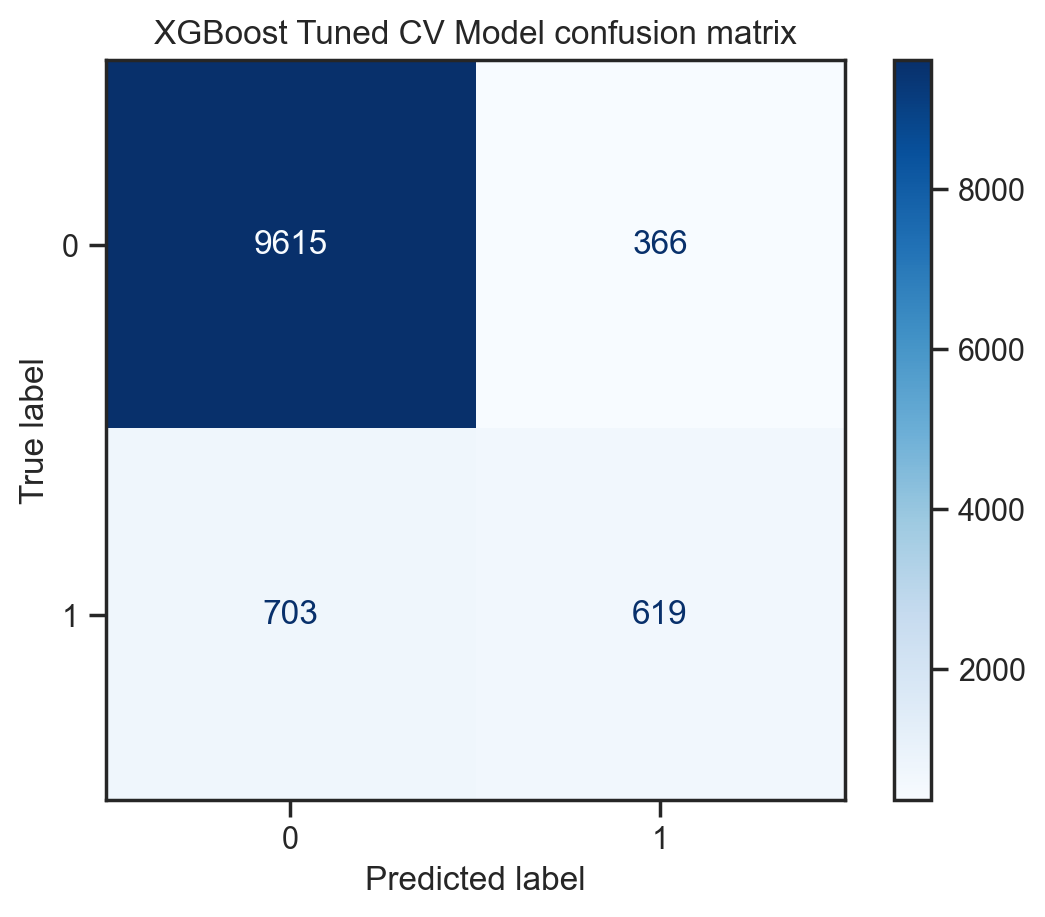

In [69]:
conf_matrix_plot('XGBoost Tuned CV', xgb_cv, X_test_scaled, y_test)

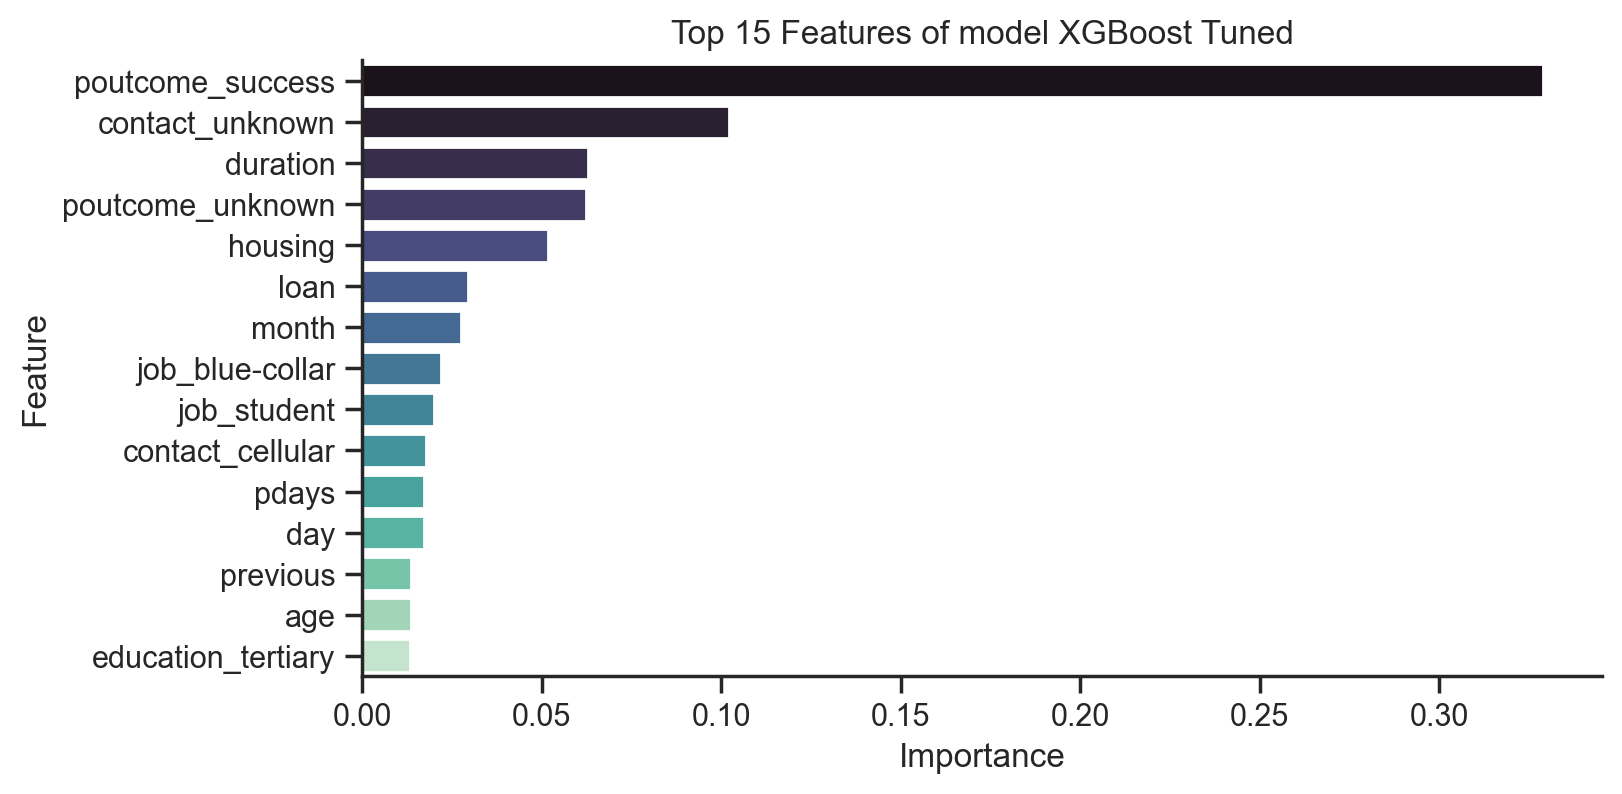

In [70]:
plot_top_features(xgb_cv.best_estimator_.feature_importances_, 'XGBoost Tuned', features, n=15)

### 3.5. Choose the Best Model
#### Compare final results

In [71]:
final_results = pd.concat(
    [
        baseline_result, 
        tree_result, 
        tree_tuned_result, 
        forest_result, 
        forest_tuned_result,
        xgb_result,
        xgb_tuned_result
    ], axis=0
).reset_index(drop=True)

final_results

Model   F1  Recall  Precision  Accuracy   Data
0     Baseline Model 0.12    0.12       0.12      0.79  Train
1     Baseline Model 0.11    0.11       0.11      0.79   Test
2               Tree 1.00    1.00       1.00      1.00  Train
3               Tree 0.48    0.47       0.48      0.88   Test
4      Tree Tuned CV 0.58    0.70       0.50      0.88  Train
5      Tree Tuned CV 0.58    0.67       0.50      0.88   Test
6             Forest 1.00    1.00       1.00      1.00  Train
7             Forest 0.47    0.37       0.67      0.90   Test
8    Forest Tuned CV 0.62    0.71       0.56      0.90  Train
9    Forest Tuned CV 0.62    0.71       0.56      0.90   Test
10           XGBoost 0.81    0.74       0.89      0.96  Train
11           XGBoost 0.55    0.48       0.64      0.91   Test
12  XGBoost Tuned CV 0.56    0.50       0.65      0.91  Train
13  XGBoost Tuned CV 0.54    0.47       0.63      0.91   Test

#### AUC/ROC

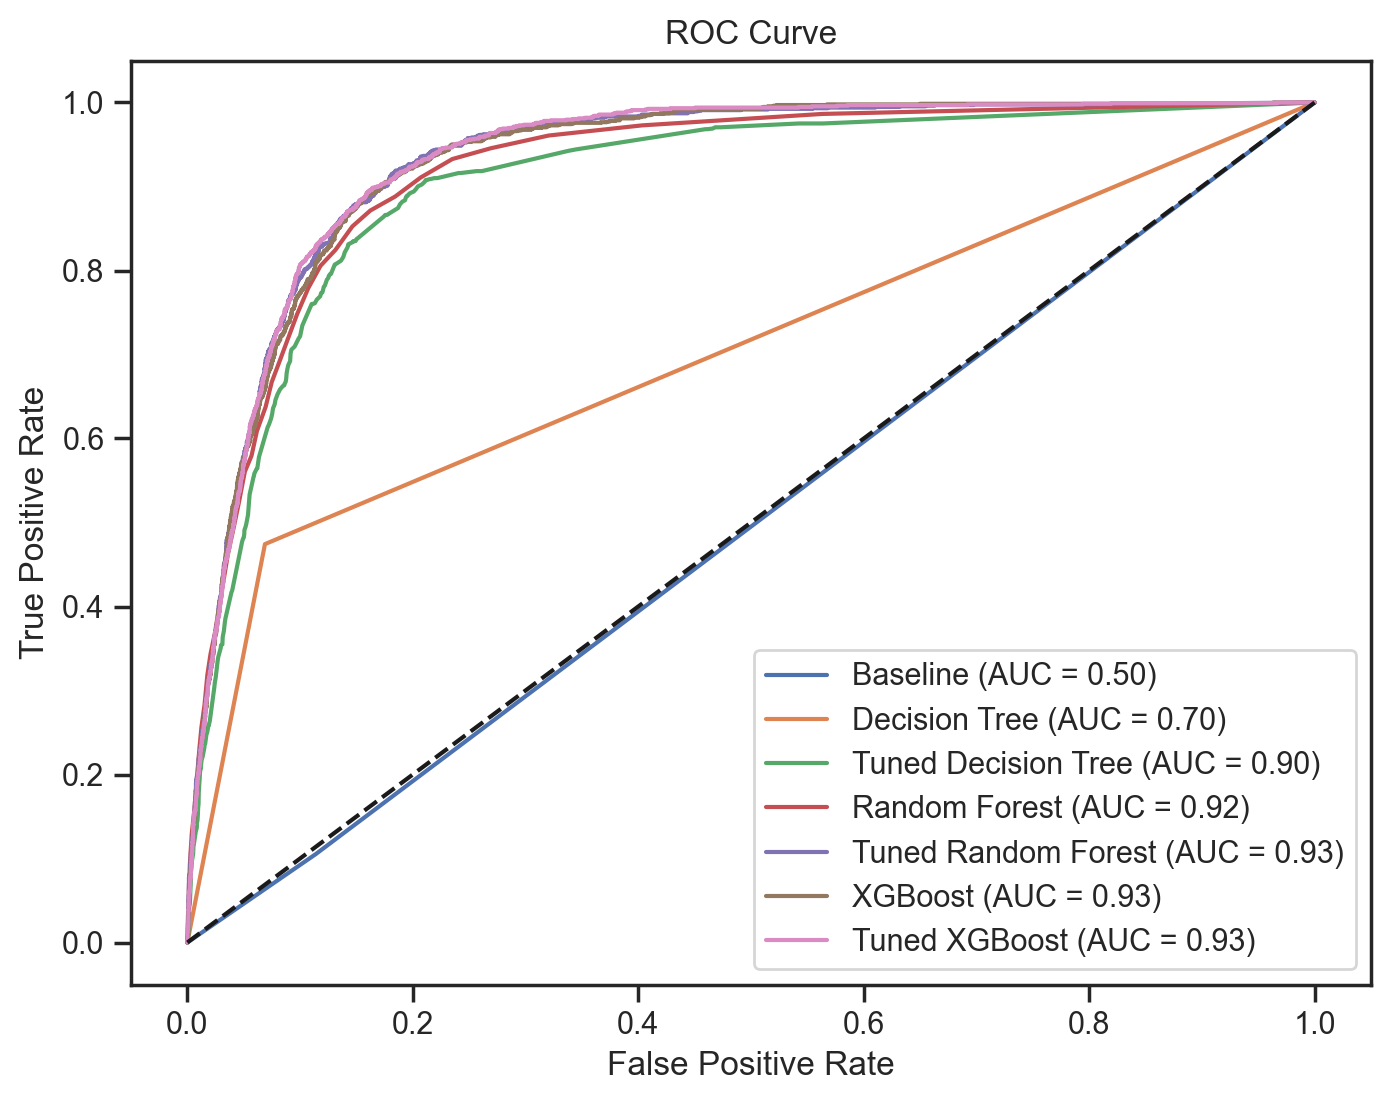

In [72]:
models = [baseline, tree, tree_cv, rf, rf_cv, xgb, xgb_cv]
model_names = ['Baseline', 'Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Tuned Random Forest', 'XGBoost', 'Tuned XGBoost']

plt.figure(figsize=(8, 6))

for model, name in zip(models, model_names):
    y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    auc_score = roc_auc_score(y_test, y_pred_probs)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

**Note:**

In our analysis, we are confronted with a classic scenario known as the Recall-Precision Tradeoff. This signifies that as the recall value increases, the corresponding precision value tends to decrease, and vice versa. Examining our models, we can observe this tradeoff quite clearly through the most finest models:

1. **Forest Tuned CV**: This model showcases a high recall rate of 72%, indicating its capacity to identify a significant portion of potential subscribers. However, the tradeoff is a precision of 56%, implying that it might also classify some non-subscribers as potential subscribers.

2. **XGBoost Tuned CV**: This model, on the other hand, presents a higher precision of 63%, suggesting that it is cautious when classifying potential subscribers. However, this is accompanied by a lower recall of 46%, indicating that it might miss some actual potential subscribers in the process.

Here's a snapshot of the performance metrics:

| Model             | F1    | Recall | Precision | Accuracy | Data  |
|-------------------|-------|--------|-----------|----------|-------|
| Forest Tuned CV   | 0.62  | 0.71   | 0.56      | 0.90     | Train |
| Forest Tuned CV   | 0.62  | 0.71   | 0.56      | 0.90     | Test  |
| XGBoost Tuned CV  | 0.54  | 0.46   | 0.63      | 0.91     | Train |
| XGBoost Tuned CV  | 0.54  | 0.46   | 0.63      | 0.91     | Test  |

Considering this tradeoff, the choice of model depends on the specific goals of the bank:

- **High Recall with Tolerable Precision**: If the bank aims to reach as many potential subscribers as possible and is willing to accept a lower precision, the Forest Tuned CV model might be preferable due to its higher recall.

- **Balanced Tradeoff**: For a balanced approach between recall and precision, where the goal is to identify potential subscribers without compromising overall accuracy, the Forest Tuned CV model is a strong contender.

- **High Precision with Tolerable Recall**: If the bank's main priority is to minimize false positives and achieve a higher precision, even if it means slightly lower recall, the XGBoost Tuned CV model could be the right choice.

Ultimately, the decision should align with the bank's specific objectives and tolerance for false positives and false negatives. It's important to strike a balance between recall and precision that aligns with the bank's marketing and business strategy.

### 3.6. Final Model Deployment

In [73]:
final_model = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8},
                                     max_depth=None,
                                     max_features=0.5,
                                     min_samples_leaf=5,
                                     min_samples_split=15,
                                     n_estimators=150,
                                     random_state=42)

final_model.fit(X_train_scaled, y_train)

y_pred = final_model.predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc)

Confusion Matrix:
 [[9249  732]
 [ 389  933]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      9981
           1       0.56      0.71      0.62      1322

    accuracy                           0.90     11303
   macro avg       0.76      0.82      0.78     11303
weighted avg       0.91      0.90      0.91     11303

ROC AUC Score: 0.93140954197241


Feature Importances on Original feature:

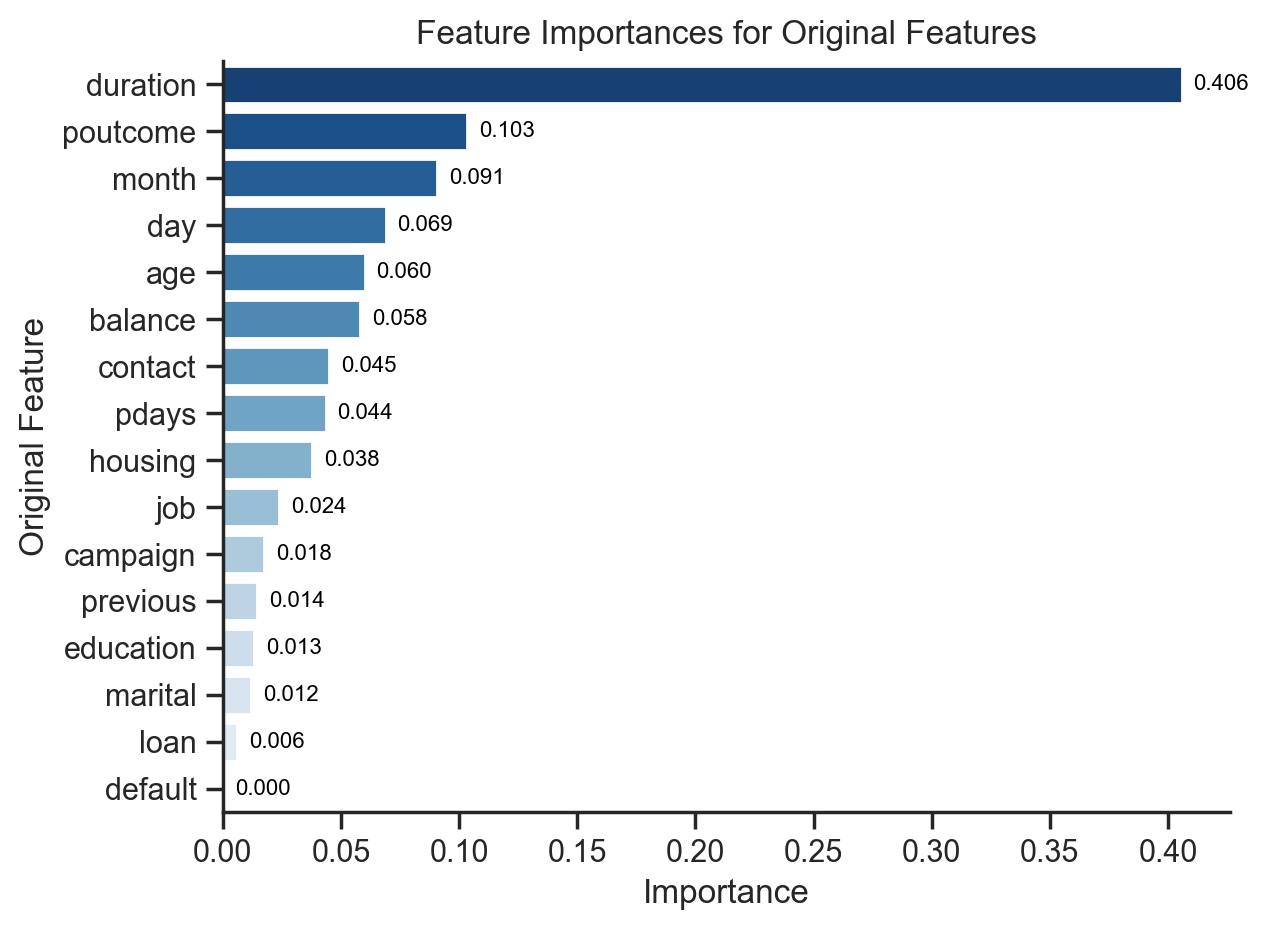

In [74]:
feature_importances = final_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

original_features = original_df.columns.tolist()
features_df['Original Feature'] = features_df['Feature'].apply(lambda x: next((original_feature for original_feature in original_features if x.startswith(original_feature)), None))
final_original_features = features_df.groupby('Original Feature')[['Importance']].sum().sort_values(by='Importance', ascending=False).reset_index()

sns.barplot(data=final_original_features, x='Importance', y='Original Feature', palette='Blues_r')
plt.xlabel('Importance')
plt.ylabel('Original Feature')
plt.title('Feature Importances for Original Features')
plt.tight_layout()
for i, v in enumerate(final_original_features['Importance']):
    plt.text(v + 0.005, i, f'{v:.3f}', color='black', va='center', fontsize=8)
sns.despine();

The final model will be saved in `final_model.py` in the same directory.

### 3.7. Final Conclusion

#### **Feature Importance Analysis:**

Here are the key insights from the feature importance analysis:

1. **Duration:** The duration of the call is the most critical factor influencing a client's decision to subscribe to a term deposit, contributing significantly to the predictive power of the model (Importance: 0.41).

2. **Previous Campaign Outcome (`poutcome`):** The outcome of the previous marketing campaign plays a notable role (Importance: 0.10), indicating that clients who responded positively before are likely to do so again.

3. **Time Factors (`month` and `day`):** The month and day of contact have considerable importance (Importance: 0.09 and 0.07, respectively). Certain months (April to August, particularly May and June) and specific days (around the middle of the month and the end/beginning of the month) exhibit higher subscription rates.

4. **Age and Balance:** While individual attributes such as age (Importance: 0.06) and average yearly balance (`balance`, Importance: 0.06) have an impact, they are not as influential as the time-related and call duration factors.

5. **Contact Communication Type (`contact`):** The method of contact (cellular, telephone) has a modest effect (Importance: 0.04), suggesting that the communication channel does contribute to the decision-making process.

6. **Previous Campaign Contact Days (`pdays`):** The number of days since the client was last contacted in a previous campaign has some influence (Importance: 0.04).

7. **Housing, Job, and Campaign Count:** Variables like housing (`housing`), job type (`job`), and the number of contacts made during this campaign (`campaign`) have minor contributions (Importance: 0.02) to the model's predictive power.

8. **Previous Contacts (`previous`), Education, Marital Status, Loan, and Default:** Factors such as the number of contacts performed before this campaign (`previous`), education level (`education`), marital status (`marital`), having a personal loan (`loan`), and credit in default (`default`) have limited impact (Importance: 0.01) on subscription likelihood.

#### Final Recommendations for the Next Campaign:

Based on the analysis and feature importance:

1. **Avoid Default and Loan:** Focus on clients without credit defaults and personal loans, as these categories have the lowest contribution to subscription success.

2. **Enhance Call Quality and Duration:** Implement strategies to improve the quality of calls and increase call duration. Ensuring engaging and informative conversations can significantly improve the likelihood of subscription, with calls lasting around 4 minutes or longer yielding the highest success rates.

3. **Target Previous Positive Respondents:** Concentrate efforts on clients who responded positively in the previous campaign, as they are more likely to subscribe again.

4. **Strategic Timing:** Plan campaigns to coincide with months that exhibit higher subscription rates (April to August), particularly targeting the middle of the month (around days 10 to 20) and periods at the end and beginning of each month. These temporal patterns offer increased chances of success.

These recommendations offer a strategic framework for optimizing the bank's marketing campaigns and enhancing subscription rates for term deposits.